In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<AxesSubplot:>

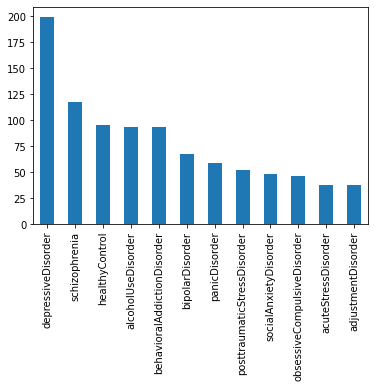

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

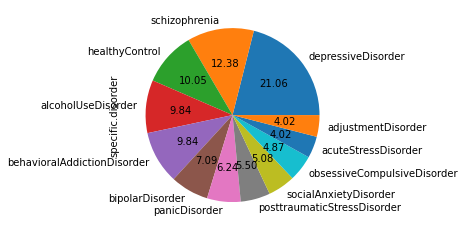

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<AxesSubplot:>

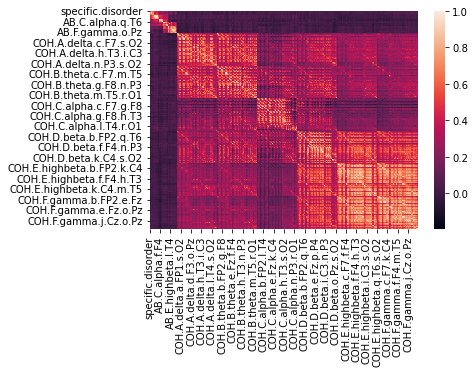

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<AxesSubplot:>

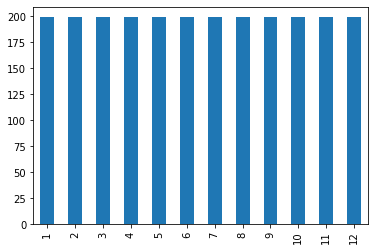

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

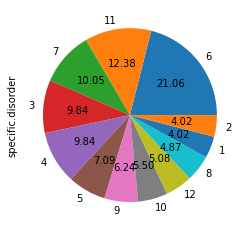

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [27]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [28]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-08-22 16:24:47,112] A new study created in memory with name: no-name-9d725782-2fa1-494a-9d15-c08bbda4a4f1
[I 2023-08-22 16:30:32,078] Trial 0 finished with value: 1.6661739656036536 and parameters: {'learning_rate': 0.048592465336578836, 'depth': 8, 'subsample': 0.5782399047305666, 'colsample_bylevel': 0.2167159066908374, 'min_data_in_leaf': 30}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 16:31:28,674] Trial 1 finished with value: 1.7569820317298732 and parameters: {'learning_rate': 0.06154022696103977, 'depth': 4, 'subsample': 0.3745860858625728, 'colsample_bylevel': 0.6668953171528305, 'min_data_in_leaf': 59}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 17:03:38,439] Trial 2 finished with value: 1.7267096255372074 and parameters: {'learning_rate': 0.020017763083546834, 'depth': 9, 'subsample': 0.2867074944148372, 'colsample_bylevel': 0.8623227340170458, 'min_data_in_leaf': 47}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 

[I 2023-08-22 22:01:13,484] Trial 28 finished with value: 2.1287990200509395 and parameters: {'learning_rate': 0.02628145965673663, 'depth': 3, 'subsample': 0.9557060406039802, 'colsample_bylevel': 0.12792148515439236, 'min_data_in_leaf': 80}. Best is trial 26 with value: 1.6186526214738628.
[I 2023-08-22 22:01:37,711] Trial 29 finished with value: 1.6952739373409245 and parameters: {'learning_rate': 0.05363311778254411, 'depth': 5, 'subsample': 0.8185544257536305, 'colsample_bylevel': 0.05732298973925675, 'min_data_in_leaf': 98}. Best is trial 26 with value: 1.6186526214738628.


In [30]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.099136565876236, 'depth': 6, 'subsample': 0.9234938333580323, 'colsample_bylevel': 0.07918042160965699, 'min_data_in_leaf': 13}
Best RMSE: 1.6186526214738628
Best accuracy: 1.6186526214738628


In [23]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [24]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4513165	total: 2.05s	remaining: 2h 50m 51s
1:	learn: 2.4040085	total: 4s	remaining: 2h 46m 31s
2:	learn: 2.3638812	total: 5.92s	remaining: 2h 44m 19s
3:	learn: 2.3370857	total: 7.79s	remaining: 2h 42m 13s
4:	learn: 2.3063289	total: 9.69s	remaining: 2h 41m 16s
5:	learn: 2.2736015	total: 11.6s	remaining: 2h 40m 28s
6:	learn: 2.2403193	total: 13.4s	remaining: 2h 39m 52s
7:	learn: 2.2163517	total: 15.3s	remaining: 2h 38m 43s
8:	learn: 2.1836832	total: 17.1s	remaining: 2h 38m
9:	learn: 2.1522750	total: 18.9s	remaining: 2h 37m 11s
10:	learn: 2.1229262	total: 20.8s	remaining: 2h 37m 15s
11:	learn: 2.0864970	total: 22.7s	remaining: 2h 37m 19s
12:	learn: 2.0618969	total: 24.6s	remaining: 2h 37m 24s
13:	learn: 2.0431991	total: 26.5s	remaining: 2h 37m 19s
14:	learn: 2.0097333	total: 28.4s	remaining: 2h 37m 27s
15:	learn: 1.9878209	total: 30.3s	remaining: 2h 37m 15s
16:	learn: 1.9627797	total: 32.2s	remaining: 2h 37m 20s
17:	learn: 1.9437438	total: 34.1s	remaining: 2h 37m 23s
18:	learn

145:	learn: 0.6202602	total: 4m 32s	remaining: 2h 30m 55s
146:	learn: 0.6182078	total: 4m 34s	remaining: 2h 30m 57s
147:	learn: 0.6130365	total: 4m 36s	remaining: 2h 30m 57s
148:	learn: 0.6103408	total: 4m 38s	remaining: 2h 30m 56s
149:	learn: 0.6065175	total: 4m 40s	remaining: 2h 30m 55s
150:	learn: 0.6045173	total: 4m 41s	remaining: 2h 30m 54s
151:	learn: 0.6002562	total: 4m 43s	remaining: 2h 30m 55s
152:	learn: 0.5967704	total: 4m 45s	remaining: 2h 30m 53s
153:	learn: 0.5912574	total: 4m 47s	remaining: 2h 30m 53s
154:	learn: 0.5880984	total: 4m 49s	remaining: 2h 30m 52s
155:	learn: 0.5855501	total: 4m 51s	remaining: 2h 30m 51s
156:	learn: 0.5830179	total: 4m 53s	remaining: 2h 30m 49s
157:	learn: 0.5805448	total: 4m 55s	remaining: 2h 30m 48s
158:	learn: 0.5763958	total: 4m 57s	remaining: 2h 30m 47s
159:	learn: 0.5738661	total: 4m 59s	remaining: 2h 30m 44s
160:	learn: 0.5706831	total: 5m	remaining: 2h 30m 44s
161:	learn: 0.5650205	total: 5m 2s	remaining: 2h 30m 42s
162:	learn: 0.56199

287:	learn: 0.3220271	total: 8m 59s	remaining: 2h 27m 11s
288:	learn: 0.3206462	total: 9m 1s	remaining: 2h 27m 9s
289:	learn: 0.3200944	total: 9m 3s	remaining: 2h 27m 6s
290:	learn: 0.3187142	total: 9m 5s	remaining: 2h 27m 4s
291:	learn: 0.3175592	total: 9m 7s	remaining: 2h 27m 3s
292:	learn: 0.3168970	total: 9m 9s	remaining: 2h 27m
293:	learn: 0.3154662	total: 9m 10s	remaining: 2h 26m 59s
294:	learn: 0.3146752	total: 9m 12s	remaining: 2h 26m 57s
295:	learn: 0.3139768	total: 9m 14s	remaining: 2h 26m 55s
296:	learn: 0.3131000	total: 9m 16s	remaining: 2h 26m 53s
297:	learn: 0.3124864	total: 9m 18s	remaining: 2h 26m 51s
298:	learn: 0.3116407	total: 9m 20s	remaining: 2h 26m 50s
299:	learn: 0.3102584	total: 9m 22s	remaining: 2h 26m 48s
300:	learn: 0.3091078	total: 9m 24s	remaining: 2h 26m 46s
301:	learn: 0.3080824	total: 9m 25s	remaining: 2h 26m 44s
302:	learn: 0.3061261	total: 9m 27s	remaining: 2h 26m 42s
303:	learn: 0.3046955	total: 9m 29s	remaining: 2h 26m 39s
304:	learn: 0.3028932	total

428:	learn: 0.2037807	total: 13m 19s	remaining: 2h 21m 58s
429:	learn: 0.2029053	total: 13m 21s	remaining: 2h 21m 56s
430:	learn: 0.2022643	total: 13m 23s	remaining: 2h 21m 54s
431:	learn: 0.2018358	total: 13m 25s	remaining: 2h 21m 52s
432:	learn: 0.2009392	total: 13m 26s	remaining: 2h 21m 50s
433:	learn: 0.2005354	total: 13m 28s	remaining: 2h 21m 48s
434:	learn: 0.1997668	total: 13m 30s	remaining: 2h 21m 45s
435:	learn: 0.1987301	total: 13m 32s	remaining: 2h 21m 43s
436:	learn: 0.1979981	total: 13m 34s	remaining: 2h 21m 41s
437:	learn: 0.1975509	total: 13m 35s	remaining: 2h 21m 38s
438:	learn: 0.1970652	total: 13m 37s	remaining: 2h 21m 36s
439:	learn: 0.1963435	total: 13m 39s	remaining: 2h 21m 33s
440:	learn: 0.1959747	total: 13m 41s	remaining: 2h 21m 31s
441:	learn: 0.1951072	total: 13m 43s	remaining: 2h 21m 28s
442:	learn: 0.1945890	total: 13m 45s	remaining: 2h 21m 26s
443:	learn: 0.1940848	total: 13m 46s	remaining: 2h 21m 23s
444:	learn: 0.1930511	total: 13m 48s	remaining: 2h 21m 2

568:	learn: 0.1326434	total: 17m 37s	remaining: 2h 17m 18s
569:	learn: 0.1321112	total: 17m 39s	remaining: 2h 17m 17s
570:	learn: 0.1318918	total: 17m 41s	remaining: 2h 17m 15s
571:	learn: 0.1316498	total: 17m 43s	remaining: 2h 17m 13s
572:	learn: 0.1311963	total: 17m 45s	remaining: 2h 17m 10s
573:	learn: 0.1306046	total: 17m 47s	remaining: 2h 17m 8s
574:	learn: 0.1302945	total: 17m 49s	remaining: 2h 17m 6s
575:	learn: 0.1298670	total: 17m 50s	remaining: 2h 17m 5s
576:	learn: 0.1295492	total: 17m 52s	remaining: 2h 17m 2s
577:	learn: 0.1289694	total: 17m 54s	remaining: 2h 17m 1s
578:	learn: 0.1284041	total: 17m 56s	remaining: 2h 16m 59s
579:	learn: 0.1279767	total: 17m 58s	remaining: 2h 16m 57s
580:	learn: 0.1276367	total: 18m	remaining: 2h 16m 55s
581:	learn: 0.1274108	total: 18m 1s	remaining: 2h 16m 53s
582:	learn: 0.1269824	total: 18m 3s	remaining: 2h 16m 51s
583:	learn: 0.1267344	total: 18m 5s	remaining: 2h 16m 48s
584:	learn: 0.1265425	total: 18m 7s	remaining: 2h 16m 47s
585:	learn

708:	learn: 0.0949722	total: 21m 58s	remaining: 2h 13m
709:	learn: 0.0948303	total: 22m	remaining: 2h 12m 59s
710:	learn: 0.0945184	total: 22m 2s	remaining: 2h 12m 57s
711:	learn: 0.0941820	total: 22m 4s	remaining: 2h 12m 55s
712:	learn: 0.0940031	total: 22m 6s	remaining: 2h 12m 53s
713:	learn: 0.0937361	total: 22m 7s	remaining: 2h 12m 51s
714:	learn: 0.0936126	total: 22m 9s	remaining: 2h 12m 49s
715:	learn: 0.0933889	total: 22m 11s	remaining: 2h 12m 47s
716:	learn: 0.0931824	total: 22m 13s	remaining: 2h 12m 46s
717:	learn: 0.0929992	total: 22m 15s	remaining: 2h 12m 44s
718:	learn: 0.0927200	total: 22m 17s	remaining: 2h 12m 41s
719:	learn: 0.0925429	total: 22m 19s	remaining: 2h 12m 40s
720:	learn: 0.0922718	total: 22m 20s	remaining: 2h 12m 38s
721:	learn: 0.0919463	total: 22m 22s	remaining: 2h 12m 36s
722:	learn: 0.0917797	total: 22m 24s	remaining: 2h 12m 34s
723:	learn: 0.0916406	total: 22m 26s	remaining: 2h 12m 32s
724:	learn: 0.0914014	total: 22m 28s	remaining: 2h 12m 30s
725:	learn

850:	learn: 0.0708033	total: 26m 13s	remaining: 2h 7m 50s
851:	learn: 0.0706487	total: 26m 15s	remaining: 2h 7m 48s
852:	learn: 0.0704634	total: 26m 16s	remaining: 2h 7m 46s
853:	learn: 0.0703236	total: 26m 18s	remaining: 2h 7m 44s
854:	learn: 0.0701523	total: 26m 20s	remaining: 2h 7m 42s
855:	learn: 0.0699794	total: 26m 22s	remaining: 2h 7m 40s
856:	learn: 0.0698781	total: 26m 24s	remaining: 2h 7m 37s
857:	learn: 0.0696361	total: 26m 25s	remaining: 2h 7m 35s
858:	learn: 0.0695054	total: 26m 27s	remaining: 2h 7m 33s
859:	learn: 0.0693214	total: 26m 29s	remaining: 2h 7m 31s
860:	learn: 0.0691191	total: 26m 31s	remaining: 2h 7m 29s
861:	learn: 0.0689696	total: 26m 33s	remaining: 2h 7m 27s
862:	learn: 0.0687847	total: 26m 34s	remaining: 2h 7m 25s
863:	learn: 0.0686295	total: 26m 36s	remaining: 2h 7m 23s
864:	learn: 0.0684450	total: 26m 38s	remaining: 2h 7m 21s
865:	learn: 0.0683039	total: 26m 40s	remaining: 2h 7m 19s
866:	learn: 0.0681681	total: 26m 42s	remaining: 2h 7m 17s
867:	learn: 0.

993:	learn: 0.0549562	total: 30m 40s	remaining: 2h 3m 37s
994:	learn: 0.0549030	total: 30m 42s	remaining: 2h 3m 35s
995:	learn: 0.0548049	total: 30m 44s	remaining: 2h 3m 33s
996:	learn: 0.0546717	total: 30m 46s	remaining: 2h 3m 32s
997:	learn: 0.0546198	total: 30m 47s	remaining: 2h 3m 30s
998:	learn: 0.0545358	total: 30m 49s	remaining: 2h 3m 28s
999:	learn: 0.0544140	total: 30m 51s	remaining: 2h 3m 26s
1000:	learn: 0.0542875	total: 30m 53s	remaining: 2h 3m 24s
1001:	learn: 0.0541551	total: 30m 55s	remaining: 2h 3m 23s
1002:	learn: 0.0540951	total: 30m 57s	remaining: 2h 3m 21s
1003:	learn: 0.0540480	total: 30m 59s	remaining: 2h 3m 19s
1004:	learn: 0.0539147	total: 31m	remaining: 2h 3m 17s
1005:	learn: 0.0538339	total: 31m 2s	remaining: 2h 3m 15s
1006:	learn: 0.0537505	total: 31m 4s	remaining: 2h 3m 13s
1007:	learn: 0.0536890	total: 31m 6s	remaining: 2h 3m 11s
1008:	learn: 0.0535908	total: 31m 8s	remaining: 2h 3m 10s
1009:	learn: 0.0535485	total: 31m 10s	remaining: 2h 3m 8s
1010:	learn: 

1135:	learn: 0.0441370	total: 35m 4s	remaining: 1h 59m 17s
1136:	learn: 0.0440750	total: 35m 6s	remaining: 1h 59m 16s
1137:	learn: 0.0439935	total: 35m 8s	remaining: 1h 59m 14s
1138:	learn: 0.0439384	total: 35m 9s	remaining: 1h 59m 12s
1139:	learn: 0.0438930	total: 35m 11s	remaining: 1h 59m 10s
1140:	learn: 0.0438274	total: 35m 13s	remaining: 1h 59m 8s
1141:	learn: 0.0437742	total: 35m 15s	remaining: 1h 59m 7s
1142:	learn: 0.0436985	total: 35m 17s	remaining: 1h 59m 5s
1143:	learn: 0.0436427	total: 35m 19s	remaining: 1h 59m 3s
1144:	learn: 0.0435852	total: 35m 21s	remaining: 1h 59m 1s
1145:	learn: 0.0435294	total: 35m 23s	remaining: 1h 58m 59s
1146:	learn: 0.0434387	total: 35m 24s	remaining: 1h 58m 58s
1147:	learn: 0.0433605	total: 35m 26s	remaining: 1h 58m 56s
1148:	learn: 0.0433051	total: 35m 28s	remaining: 1h 58m 54s
1149:	learn: 0.0432633	total: 35m 30s	remaining: 1h 58m 53s
1150:	learn: 0.0432242	total: 35m 32s	remaining: 1h 58m 51s
1151:	learn: 0.0431889	total: 35m 34s	remaining: 

1273:	learn: 0.0371958	total: 39m 21s	remaining: 1h 55m 5s
1274:	learn: 0.0371551	total: 39m 22s	remaining: 1h 55m 3s
1275:	learn: 0.0371290	total: 39m 24s	remaining: 1h 55m 1s
1276:	learn: 0.0371113	total: 39m 26s	remaining: 1h 54m 59s
1277:	learn: 0.0370863	total: 39m 28s	remaining: 1h 54m 58s
1278:	learn: 0.0370395	total: 39m 30s	remaining: 1h 54m 56s
1279:	learn: 0.0370191	total: 39m 32s	remaining: 1h 54m 54s
1280:	learn: 0.0369696	total: 39m 34s	remaining: 1h 54m 52s
1281:	learn: 0.0369150	total: 39m 36s	remaining: 1h 54m 50s
1282:	learn: 0.0368701	total: 39m 37s	remaining: 1h 54m 49s
1283:	learn: 0.0368246	total: 39m 39s	remaining: 1h 54m 47s
1284:	learn: 0.0367590	total: 39m 41s	remaining: 1h 54m 45s
1285:	learn: 0.0367124	total: 39m 43s	remaining: 1h 54m 43s
1286:	learn: 0.0366611	total: 39m 45s	remaining: 1h 54m 41s
1287:	learn: 0.0366316	total: 39m 47s	remaining: 1h 54m 39s
1288:	learn: 0.0365769	total: 39m 49s	remaining: 1h 54m 37s
1289:	learn: 0.0365450	total: 39m 50s	remai

1411:	learn: 0.0319203	total: 43m 37s	remaining: 1h 50m 51s
1412:	learn: 0.0318789	total: 43m 39s	remaining: 1h 50m 49s
1413:	learn: 0.0318299	total: 43m 41s	remaining: 1h 50m 47s
1414:	learn: 0.0318164	total: 43m 43s	remaining: 1h 50m 45s
1415:	learn: 0.0317873	total: 43m 44s	remaining: 1h 50m 43s
1416:	learn: 0.0317676	total: 43m 46s	remaining: 1h 50m 41s
1417:	learn: 0.0317559	total: 43m 48s	remaining: 1h 50m 40s
1418:	learn: 0.0317153	total: 43m 50s	remaining: 1h 50m 38s
1419:	learn: 0.0317007	total: 43m 52s	remaining: 1h 50m 36s
1420:	learn: 0.0316638	total: 43m 54s	remaining: 1h 50m 34s
1421:	learn: 0.0316366	total: 43m 56s	remaining: 1h 50m 32s
1422:	learn: 0.0315704	total: 43m 57s	remaining: 1h 50m 30s
1423:	learn: 0.0315399	total: 43m 59s	remaining: 1h 50m 29s
1424:	learn: 0.0315161	total: 44m 1s	remaining: 1h 50m 27s
1425:	learn: 0.0314793	total: 44m 3s	remaining: 1h 50m 25s
1426:	learn: 0.0314541	total: 44m 5s	remaining: 1h 50m 23s
1427:	learn: 0.0314318	total: 44m 7s	remain

1549:	learn: 0.0279759	total: 47m 53s	remaining: 1h 46m 35s
1550:	learn: 0.0279600	total: 47m 55s	remaining: 1h 46m 33s
1551:	learn: 0.0279438	total: 47m 57s	remaining: 1h 46m 31s
1552:	learn: 0.0279113	total: 47m 58s	remaining: 1h 46m 30s
1553:	learn: 0.0278904	total: 48m	remaining: 1h 46m 28s
1554:	learn: 0.0278531	total: 48m 2s	remaining: 1h 46m 26s
1555:	learn: 0.0278318	total: 48m 4s	remaining: 1h 46m 24s
1556:	learn: 0.0278062	total: 48m 6s	remaining: 1h 46m 22s
1557:	learn: 0.0277738	total: 48m 8s	remaining: 1h 46m 20s
1558:	learn: 0.0277557	total: 48m 10s	remaining: 1h 46m 19s
1559:	learn: 0.0277208	total: 48m 12s	remaining: 1h 46m 17s
1560:	learn: 0.0276919	total: 48m 13s	remaining: 1h 46m 15s
1561:	learn: 0.0276766	total: 48m 15s	remaining: 1h 46m 13s
1562:	learn: 0.0276541	total: 48m 17s	remaining: 1h 46m 11s
1563:	learn: 0.0276274	total: 48m 19s	remaining: 1h 46m 9s
1564:	learn: 0.0275973	total: 48m 21s	remaining: 1h 46m 8s
1565:	learn: 0.0275688	total: 48m 23s	remaining: 1

1687:	learn: 0.0246441	total: 52m 9s	remaining: 1h 42m 20s
1688:	learn: 0.0246262	total: 52m 11s	remaining: 1h 42m 18s
1689:	learn: 0.0246110	total: 52m 13s	remaining: 1h 42m 16s
1690:	learn: 0.0245892	total: 52m 15s	remaining: 1h 42m 14s
1691:	learn: 0.0245822	total: 52m 16s	remaining: 1h 42m 13s
1692:	learn: 0.0245570	total: 52m 18s	remaining: 1h 42m 11s
1693:	learn: 0.0245483	total: 52m 20s	remaining: 1h 42m 9s
1694:	learn: 0.0245230	total: 52m 22s	remaining: 1h 42m 7s
1695:	learn: 0.0245096	total: 52m 24s	remaining: 1h 42m 5s
1696:	learn: 0.0244835	total: 52m 26s	remaining: 1h 42m 3s
1697:	learn: 0.0244754	total: 52m 28s	remaining: 1h 42m 1s
1698:	learn: 0.0244454	total: 52m 29s	remaining: 1h 41m 59s
1699:	learn: 0.0244264	total: 52m 31s	remaining: 1h 41m 58s
1700:	learn: 0.0244033	total: 52m 33s	remaining: 1h 41m 56s
1701:	learn: 0.0243871	total: 52m 35s	remaining: 1h 41m 54s
1702:	learn: 0.0243717	total: 52m 37s	remaining: 1h 41m 52s
1703:	learn: 0.0243468	total: 52m 39s	remainin

1825:	learn: 0.0220246	total: 56m 25s	remaining: 1h 38m 4s
1826:	learn: 0.0220106	total: 56m 26s	remaining: 1h 38m 2s
1827:	learn: 0.0219852	total: 56m 28s	remaining: 1h 38m
1828:	learn: 0.0219770	total: 56m 30s	remaining: 1h 37m 58s
1829:	learn: 0.0219642	total: 56m 32s	remaining: 1h 37m 56s
1830:	learn: 0.0219408	total: 56m 34s	remaining: 1h 37m 54s
1831:	learn: 0.0219240	total: 56m 36s	remaining: 1h 37m 52s
1832:	learn: 0.0219056	total: 56m 38s	remaining: 1h 37m 51s
1833:	learn: 0.0218846	total: 56m 39s	remaining: 1h 37m 49s
1834:	learn: 0.0218680	total: 56m 41s	remaining: 1h 37m 47s
1835:	learn: 0.0218489	total: 56m 43s	remaining: 1h 37m 45s
1836:	learn: 0.0218271	total: 56m 45s	remaining: 1h 37m 43s
1837:	learn: 0.0218088	total: 56m 47s	remaining: 1h 37m 41s
1838:	learn: 0.0217996	total: 56m 49s	remaining: 1h 37m 40s
1839:	learn: 0.0217741	total: 56m 51s	remaining: 1h 37m 38s
1840:	learn: 0.0217617	total: 56m 53s	remaining: 1h 37m 36s
1841:	learn: 0.0217408	total: 56m 55s	remainin

1963:	learn: 0.0197640	total: 1h 41s	remaining: 1h 33m 48s
1964:	learn: 0.0197461	total: 1h 42s	remaining: 1h 33m 46s
1965:	learn: 0.0197341	total: 1h 44s	remaining: 1h 33m 44s
1966:	learn: 0.0197208	total: 1h 46s	remaining: 1h 33m 42s
1967:	learn: 0.0197058	total: 1h 48s	remaining: 1h 33m 40s
1968:	learn: 0.0196934	total: 1h 50s	remaining: 1h 33m 38s
1969:	learn: 0.0196759	total: 1h 51s	remaining: 1h 33m 36s
1970:	learn: 0.0196616	total: 1h 53s	remaining: 1h 33m 35s
1971:	learn: 0.0196412	total: 1h 55s	remaining: 1h 33m 33s
1972:	learn: 0.0196278	total: 1h 57s	remaining: 1h 33m 31s
1973:	learn: 0.0196074	total: 1h 59s	remaining: 1h 33m 29s
1974:	learn: 0.0195860	total: 1h 1m 1s	remaining: 1h 33m 27s
1975:	learn: 0.0195741	total: 1h 1m 2s	remaining: 1h 33m 25s
1976:	learn: 0.0195626	total: 1h 1m 4s	remaining: 1h 33m 23s
1977:	learn: 0.0195564	total: 1h 1m 6s	remaining: 1h 33m 21s
1978:	learn: 0.0195425	total: 1h 1m 8s	remaining: 1h 33m 20s
1979:	learn: 0.0195233	total: 1h 1m 10s	remain

2097:	learn: 0.0179784	total: 1h 4m 50s	remaining: 1h 29m 40s
2098:	learn: 0.0179610	total: 1h 4m 51s	remaining: 1h 29m 39s
2099:	learn: 0.0179443	total: 1h 4m 53s	remaining: 1h 29m 37s
2100:	learn: 0.0179390	total: 1h 4m 55s	remaining: 1h 29m 35s
2101:	learn: 0.0179250	total: 1h 4m 57s	remaining: 1h 29m 33s
2102:	learn: 0.0179083	total: 1h 4m 59s	remaining: 1h 29m 31s
2103:	learn: 0.0178992	total: 1h 5m 1s	remaining: 1h 29m 29s
2104:	learn: 0.0178928	total: 1h 5m 3s	remaining: 1h 29m 27s
2105:	learn: 0.0178788	total: 1h 5m 4s	remaining: 1h 29m 26s
2106:	learn: 0.0178758	total: 1h 5m 6s	remaining: 1h 29m 24s
2107:	learn: 0.0178634	total: 1h 5m 8s	remaining: 1h 29m 22s
2108:	learn: 0.0178504	total: 1h 5m 10s	remaining: 1h 29m 20s
2109:	learn: 0.0178356	total: 1h 5m 12s	remaining: 1h 29m 18s
2110:	learn: 0.0178228	total: 1h 5m 14s	remaining: 1h 29m 16s
2111:	learn: 0.0178058	total: 1h 5m 16s	remaining: 1h 29m 15s
2112:	learn: 0.0177913	total: 1h 5m 18s	remaining: 1h 29m 13s
2113:	learn: 

2231:	learn: 0.0164779	total: 1h 8m 58s	remaining: 1h 25m 31s
2232:	learn: 0.0164627	total: 1h 8m 59s	remaining: 1h 25m 29s
2233:	learn: 0.0164528	total: 1h 9m 1s	remaining: 1h 25m 28s
2234:	learn: 0.0164457	total: 1h 9m 3s	remaining: 1h 25m 26s
2235:	learn: 0.0164369	total: 1h 9m 5s	remaining: 1h 25m 24s
2236:	learn: 0.0164265	total: 1h 9m 7s	remaining: 1h 25m 22s
2237:	learn: 0.0164185	total: 1h 9m 8s	remaining: 1h 25m 20s
2238:	learn: 0.0164036	total: 1h 9m 10s	remaining: 1h 25m 18s
2239:	learn: 0.0163905	total: 1h 9m 12s	remaining: 1h 25m 16s
2240:	learn: 0.0163825	total: 1h 9m 14s	remaining: 1h 25m 14s
2241:	learn: 0.0163770	total: 1h 9m 15s	remaining: 1h 25m 12s
2242:	learn: 0.0163648	total: 1h 9m 17s	remaining: 1h 25m 10s
2243:	learn: 0.0163598	total: 1h 9m 19s	remaining: 1h 25m 8s
2244:	learn: 0.0163565	total: 1h 9m 21s	remaining: 1h 25m 6s
2245:	learn: 0.0163450	total: 1h 9m 23s	remaining: 1h 25m 5s
2246:	learn: 0.0163411	total: 1h 9m 25s	remaining: 1h 25m 3s
2247:	learn: 0.01

2363:	learn: 0.0152028	total: 1h 13m 4s	remaining: 1h 21m 29s
2364:	learn: 0.0151893	total: 1h 13m 6s	remaining: 1h 21m 27s
2365:	learn: 0.0151836	total: 1h 13m 8s	remaining: 1h 21m 25s
2366:	learn: 0.0151696	total: 1h 13m 10s	remaining: 1h 21m 23s
2367:	learn: 0.0151568	total: 1h 13m 12s	remaining: 1h 21m 21s
2368:	learn: 0.0151503	total: 1h 13m 14s	remaining: 1h 21m 19s
2369:	learn: 0.0151438	total: 1h 13m 15s	remaining: 1h 21m 18s
2370:	learn: 0.0151382	total: 1h 13m 17s	remaining: 1h 21m 16s
2371:	learn: 0.0151338	total: 1h 13m 19s	remaining: 1h 21m 14s
2372:	learn: 0.0151230	total: 1h 13m 21s	remaining: 1h 21m 12s
2373:	learn: 0.0151145	total: 1h 13m 23s	remaining: 1h 21m 10s
2374:	learn: 0.0151049	total: 1h 13m 25s	remaining: 1h 21m 8s
2375:	learn: 0.0150998	total: 1h 13m 26s	remaining: 1h 21m 6s
2376:	learn: 0.0150898	total: 1h 13m 28s	remaining: 1h 21m 5s
2377:	learn: 0.0150755	total: 1h 13m 30s	remaining: 1h 21m 3s
2378:	learn: 0.0150700	total: 1h 13m 32s	remaining: 1h 21m 1s


2495:	learn: 0.0141264	total: 1h 17m 11s	remaining: 1h 17m 26s
2496:	learn: 0.0141202	total: 1h 17m 13s	remaining: 1h 17m 24s
2497:	learn: 0.0141108	total: 1h 17m 15s	remaining: 1h 17m 22s
2498:	learn: 0.0141015	total: 1h 17m 17s	remaining: 1h 17m 20s
2499:	learn: 0.0140889	total: 1h 17m 19s	remaining: 1h 17m 19s
2500:	learn: 0.0140845	total: 1h 17m 20s	remaining: 1h 17m 17s
2501:	learn: 0.0140787	total: 1h 17m 22s	remaining: 1h 17m 15s
2502:	learn: 0.0140707	total: 1h 17m 24s	remaining: 1h 17m 13s
2503:	learn: 0.0140639	total: 1h 17m 26s	remaining: 1h 17m 11s
2504:	learn: 0.0140583	total: 1h 17m 28s	remaining: 1h 17m 9s
2505:	learn: 0.0140503	total: 1h 17m 30s	remaining: 1h 17m 7s
2506:	learn: 0.0140418	total: 1h 17m 32s	remaining: 1h 17m 6s
2507:	learn: 0.0140320	total: 1h 17m 34s	remaining: 1h 17m 4s
2508:	learn: 0.0140294	total: 1h 17m 35s	remaining: 1h 17m 2s
2509:	learn: 0.0140235	total: 1h 17m 37s	remaining: 1h 17m
2510:	learn: 0.0140193	total: 1h 17m 39s	remaining: 1h 16m 58s
2

2626:	learn: 0.0131753	total: 1h 21m 15s	remaining: 1h 13m 24s
2627:	learn: 0.0131676	total: 1h 21m 17s	remaining: 1h 13m 22s
2628:	learn: 0.0131622	total: 1h 21m 19s	remaining: 1h 13m 20s
2629:	learn: 0.0131571	total: 1h 21m 21s	remaining: 1h 13m 18s
2630:	learn: 0.0131497	total: 1h 21m 23s	remaining: 1h 13m 17s
2631:	learn: 0.0131422	total: 1h 21m 25s	remaining: 1h 13m 15s
2632:	learn: 0.0131371	total: 1h 21m 27s	remaining: 1h 13m 13s
2633:	learn: 0.0131293	total: 1h 21m 29s	remaining: 1h 13m 11s
2634:	learn: 0.0131216	total: 1h 21m 30s	remaining: 1h 13m 9s
2635:	learn: 0.0131161	total: 1h 21m 32s	remaining: 1h 13m 7s
2636:	learn: 0.0131062	total: 1h 21m 34s	remaining: 1h 13m 6s
2637:	learn: 0.0130980	total: 1h 21m 36s	remaining: 1h 13m 4s
2638:	learn: 0.0130924	total: 1h 21m 38s	remaining: 1h 13m 2s
2639:	learn: 0.0130904	total: 1h 21m 40s	remaining: 1h 13m
2640:	learn: 0.0130863	total: 1h 21m 42s	remaining: 1h 12m 58s
2641:	learn: 0.0130827	total: 1h 21m 43s	remaining: 1h 12m 56s
2

2758:	learn: 0.0123475	total: 1h 25m 23s	remaining: 1h 9m 21s
2759:	learn: 0.0123426	total: 1h 25m 25s	remaining: 1h 9m 19s
2760:	learn: 0.0123382	total: 1h 25m 27s	remaining: 1h 9m 17s
2761:	learn: 0.0123332	total: 1h 25m 29s	remaining: 1h 9m 16s
2762:	learn: 0.0123302	total: 1h 25m 30s	remaining: 1h 9m 14s
2763:	learn: 0.0123267	total: 1h 25m 32s	remaining: 1h 9m 12s
2764:	learn: 0.0123218	total: 1h 25m 34s	remaining: 1h 9m 10s
2765:	learn: 0.0123189	total: 1h 25m 36s	remaining: 1h 9m 8s
2766:	learn: 0.0123162	total: 1h 25m 38s	remaining: 1h 9m 6s
2767:	learn: 0.0123144	total: 1h 25m 40s	remaining: 1h 9m 4s
2768:	learn: 0.0123071	total: 1h 25m 42s	remaining: 1h 9m 3s
2769:	learn: 0.0123012	total: 1h 25m 44s	remaining: 1h 9m 1s
2770:	learn: 0.0122952	total: 1h 25m 45s	remaining: 1h 8m 59s
2771:	learn: 0.0122884	total: 1h 25m 47s	remaining: 1h 8m 57s
2772:	learn: 0.0122791	total: 1h 25m 49s	remaining: 1h 8m 55s
2773:	learn: 0.0122729	total: 1h 25m 51s	remaining: 1h 8m 53s
2774:	learn: 

2892:	learn: 0.0115871	total: 1h 29m 33s	remaining: 1h 5m 13s
2893:	learn: 0.0115801	total: 1h 29m 35s	remaining: 1h 5m 11s
2894:	learn: 0.0115701	total: 1h 29m 37s	remaining: 1h 5m 9s
2895:	learn: 0.0115697	total: 1h 29m 38s	remaining: 1h 5m 7s
2896:	learn: 0.0115632	total: 1h 29m 40s	remaining: 1h 5m 6s
2897:	learn: 0.0115582	total: 1h 29m 42s	remaining: 1h 5m 4s
2898:	learn: 0.0115495	total: 1h 29m 44s	remaining: 1h 5m 2s
2899:	learn: 0.0115461	total: 1h 29m 46s	remaining: 1h 5m
2900:	learn: 0.0115438	total: 1h 29m 48s	remaining: 1h 4m 58s
2901:	learn: 0.0115380	total: 1h 29m 50s	remaining: 1h 4m 56s
2902:	learn: 0.0115330	total: 1h 29m 52s	remaining: 1h 4m 55s
2903:	learn: 0.0115271	total: 1h 29m 54s	remaining: 1h 4m 53s
2904:	learn: 0.0115189	total: 1h 29m 55s	remaining: 1h 4m 51s
2905:	learn: 0.0115133	total: 1h 29m 57s	remaining: 1h 4m 49s
2906:	learn: 0.0115070	total: 1h 29m 59s	remaining: 1h 4m 47s
2907:	learn: 0.0115051	total: 1h 30m 1s	remaining: 1h 4m 45s
2908:	learn: 0.011

3026:	learn: 0.0108732	total: 1h 33m 40s	remaining: 1h 1m 3s
3027:	learn: 0.0108699	total: 1h 33m 42s	remaining: 1h 1m 1s
3028:	learn: 0.0108653	total: 1h 33m 44s	remaining: 1h 59s
3029:	learn: 0.0108614	total: 1h 33m 46s	remaining: 1h 58s
3030:	learn: 0.0108594	total: 1h 33m 48s	remaining: 1h 56s
3031:	learn: 0.0108522	total: 1h 33m 49s	remaining: 1h 54s
3032:	learn: 0.0108461	total: 1h 33m 51s	remaining: 1h 52s
3033:	learn: 0.0108394	total: 1h 33m 53s	remaining: 1h 50s
3034:	learn: 0.0108334	total: 1h 33m 55s	remaining: 1h 48s
3035:	learn: 0.0108309	total: 1h 33m 57s	remaining: 1h 46s
3036:	learn: 0.0108256	total: 1h 33m 58s	remaining: 1h 44s
3037:	learn: 0.0108202	total: 1h 34m	remaining: 1h 42s
3038:	learn: 0.0108128	total: 1h 34m 2s	remaining: 1h 41s
3039:	learn: 0.0108076	total: 1h 34m 4s	remaining: 1h 39s
3040:	learn: 0.0108030	total: 1h 34m 6s	remaining: 1h 37s
3041:	learn: 0.0108003	total: 1h 34m 8s	remaining: 1h 35s
3042:	learn: 0.0107917	total: 1h 34m 9s	remaining: 1h 33s
30

3165:	learn: 0.0102642	total: 1h 37m 58s	remaining: 56m 45s
3166:	learn: 0.0102610	total: 1h 38m	remaining: 56m 43s
3167:	learn: 0.0102583	total: 1h 38m 2s	remaining: 56m 41s
3168:	learn: 0.0102511	total: 1h 38m 4s	remaining: 56m 39s
3169:	learn: 0.0102451	total: 1h 38m 6s	remaining: 56m 38s
3170:	learn: 0.0102404	total: 1h 38m 8s	remaining: 56m 36s
3171:	learn: 0.0102368	total: 1h 38m 10s	remaining: 56m 34s
3172:	learn: 0.0102310	total: 1h 38m 11s	remaining: 56m 32s
3173:	learn: 0.0102260	total: 1h 38m 13s	remaining: 56m 30s
3174:	learn: 0.0102211	total: 1h 38m 15s	remaining: 56m 28s
3175:	learn: 0.0102154	total: 1h 38m 17s	remaining: 56m 26s
3176:	learn: 0.0102134	total: 1h 38m 19s	remaining: 56m 25s
3177:	learn: 0.0102112	total: 1h 38m 21s	remaining: 56m 23s
3178:	learn: 0.0102099	total: 1h 38m 23s	remaining: 56m 21s
3179:	learn: 0.0102042	total: 1h 38m 24s	remaining: 56m 19s
3180:	learn: 0.0101991	total: 1h 38m 26s	remaining: 56m 17s
3181:	learn: 0.0101952	total: 1h 38m 28s	remaini

3303:	learn: 0.0097126	total: 1h 42m 17s	remaining: 52m 30s
3304:	learn: 0.0097062	total: 1h 42m 19s	remaining: 52m 28s
3305:	learn: 0.0097025	total: 1h 42m 21s	remaining: 52m 26s
3306:	learn: 0.0096977	total: 1h 42m 23s	remaining: 52m 25s
3307:	learn: 0.0096946	total: 1h 42m 25s	remaining: 52m 23s
3308:	learn: 0.0096905	total: 1h 42m 27s	remaining: 52m 21s
3309:	learn: 0.0096877	total: 1h 42m 28s	remaining: 52m 19s
3310:	learn: 0.0096853	total: 1h 42m 30s	remaining: 52m 17s
3311:	learn: 0.0096823	total: 1h 42m 32s	remaining: 52m 15s
3312:	learn: 0.0096779	total: 1h 42m 34s	remaining: 52m 13s
3313:	learn: 0.0096750	total: 1h 42m 36s	remaining: 52m 12s
3314:	learn: 0.0096726	total: 1h 42m 38s	remaining: 52m 10s
3315:	learn: 0.0096671	total: 1h 42m 40s	remaining: 52m 8s
3316:	learn: 0.0096636	total: 1h 42m 42s	remaining: 52m 6s
3317:	learn: 0.0096603	total: 1h 42m 43s	remaining: 52m 4s
3318:	learn: 0.0096567	total: 1h 42m 45s	remaining: 52m 2s
3319:	learn: 0.0096522	total: 1h 42m 47s	rem

3441:	learn: 0.0091980	total: 1h 46m 36s	remaining: 48m 15s
3442:	learn: 0.0091956	total: 1h 46m 37s	remaining: 48m 13s
3443:	learn: 0.0091904	total: 1h 46m 39s	remaining: 48m 11s
3444:	learn: 0.0091855	total: 1h 46m 41s	remaining: 48m 9s
3445:	learn: 0.0091810	total: 1h 46m 43s	remaining: 48m 7s
3446:	learn: 0.0091761	total: 1h 46m 45s	remaining: 48m 5s
3447:	learn: 0.0091715	total: 1h 46m 47s	remaining: 48m 4s
3448:	learn: 0.0091686	total: 1h 46m 49s	remaining: 48m 2s
3449:	learn: 0.0091640	total: 1h 46m 51s	remaining: 48m
3450:	learn: 0.0091599	total: 1h 46m 52s	remaining: 47m 58s
3451:	learn: 0.0091568	total: 1h 46m 54s	remaining: 47m 56s
3452:	learn: 0.0091543	total: 1h 46m 56s	remaining: 47m 54s
3453:	learn: 0.0091515	total: 1h 46m 58s	remaining: 47m 52s
3454:	learn: 0.0091486	total: 1h 47m	remaining: 47m 51s
3455:	learn: 0.0091449	total: 1h 47m 2s	remaining: 47m 49s
3456:	learn: 0.0091412	total: 1h 47m 4s	remaining: 47m 47s
3457:	learn: 0.0091377	total: 1h 47m 6s	remaining: 47m 

3579:	learn: 0.0087184	total: 1h 50m 54s	remaining: 43m 59s
3580:	learn: 0.0087160	total: 1h 50m 56s	remaining: 43m 57s
3581:	learn: 0.0087124	total: 1h 50m 58s	remaining: 43m 55s
3582:	learn: 0.0087089	total: 1h 51m	remaining: 43m 54s
3583:	learn: 0.0087048	total: 1h 51m 2s	remaining: 43m 52s
3584:	learn: 0.0087032	total: 1h 51m 4s	remaining: 43m 50s
3585:	learn: 0.0087019	total: 1h 51m 5s	remaining: 43m 48s
3586:	learn: 0.0086973	total: 1h 51m 7s	remaining: 43m 46s
3587:	learn: 0.0086939	total: 1h 51m 9s	remaining: 43m 44s
3588:	learn: 0.0086895	total: 1h 51m 11s	remaining: 43m 42s
3589:	learn: 0.0086842	total: 1h 51m 13s	remaining: 43m 41s
3590:	learn: 0.0086836	total: 1h 51m 15s	remaining: 43m 39s
3591:	learn: 0.0086822	total: 1h 51m 17s	remaining: 43m 37s
3592:	learn: 0.0086783	total: 1h 51m 19s	remaining: 43m 35s
3593:	learn: 0.0086740	total: 1h 51m 20s	remaining: 43m 33s
3594:	learn: 0.0086685	total: 1h 51m 22s	remaining: 43m 31s
3595:	learn: 0.0086650	total: 1h 51m 24s	remainin

3717:	learn: 0.0083189	total: 1h 55m 10s	remaining: 39m 42s
3718:	learn: 0.0083177	total: 1h 55m 12s	remaining: 39m 40s
3719:	learn: 0.0083151	total: 1h 55m 14s	remaining: 39m 39s
3720:	learn: 0.0083126	total: 1h 55m 16s	remaining: 39m 37s
3721:	learn: 0.0083077	total: 1h 55m 17s	remaining: 39m 35s
3722:	learn: 0.0083034	total: 1h 55m 19s	remaining: 39m 33s
3723:	learn: 0.0083009	total: 1h 55m 21s	remaining: 39m 31s
3724:	learn: 0.0082974	total: 1h 55m 23s	remaining: 39m 29s
3725:	learn: 0.0082944	total: 1h 55m 25s	remaining: 39m 27s
3726:	learn: 0.0082903	total: 1h 55m 27s	remaining: 39m 26s
3727:	learn: 0.0082846	total: 1h 55m 29s	remaining: 39m 24s
3728:	learn: 0.0082810	total: 1h 55m 31s	remaining: 39m 22s
3729:	learn: 0.0082775	total: 1h 55m 32s	remaining: 39m 20s
3730:	learn: 0.0082735	total: 1h 55m 34s	remaining: 39m 18s
3731:	learn: 0.0082707	total: 1h 55m 36s	remaining: 39m 16s
3732:	learn: 0.0082670	total: 1h 55m 38s	remaining: 39m 15s
3733:	learn: 0.0082655	total: 1h 55m 40s

3855:	learn: 0.0079216	total: 1h 59m 28s	remaining: 35m 26s
3856:	learn: 0.0079188	total: 1h 59m 30s	remaining: 35m 24s
3857:	learn: 0.0079152	total: 1h 59m 32s	remaining: 35m 23s
3858:	learn: 0.0079112	total: 1h 59m 34s	remaining: 35m 21s
3859:	learn: 0.0079091	total: 1h 59m 35s	remaining: 35m 19s
3860:	learn: 0.0079059	total: 1h 59m 37s	remaining: 35m 17s
3861:	learn: 0.0079028	total: 1h 59m 39s	remaining: 35m 15s
3862:	learn: 0.0079004	total: 1h 59m 41s	remaining: 35m 13s
3863:	learn: 0.0078991	total: 1h 59m 43s	remaining: 35m 11s
3864:	learn: 0.0078950	total: 1h 59m 45s	remaining: 35m 10s
3865:	learn: 0.0078936	total: 1h 59m 47s	remaining: 35m 8s
3866:	learn: 0.0078934	total: 1h 59m 48s	remaining: 35m 6s
3867:	learn: 0.0078904	total: 1h 59m 50s	remaining: 35m 4s
3868:	learn: 0.0078863	total: 1h 59m 52s	remaining: 35m 2s
3869:	learn: 0.0078825	total: 1h 59m 54s	remaining: 35m
3870:	learn: 0.0078801	total: 1h 59m 56s	remaining: 34m 58s
3871:	learn: 0.0078775	total: 1h 59m 58s	remaini

3997:	learn: 0.0075663	total: 2h 3m 52s	remaining: 31m 2s
3998:	learn: 0.0075627	total: 2h 3m 54s	remaining: 31m 1s
3999:	learn: 0.0075598	total: 2h 3m 56s	remaining: 30m 59s
4000:	learn: 0.0075581	total: 2h 3m 58s	remaining: 30m 57s
4001:	learn: 0.0075561	total: 2h 4m	remaining: 30m 55s
4002:	learn: 0.0075544	total: 2h 4m 2s	remaining: 30m 53s
4003:	learn: 0.0075526	total: 2h 4m 4s	remaining: 30m 51s
4004:	learn: 0.0075507	total: 2h 4m 6s	remaining: 30m 49s
4005:	learn: 0.0075477	total: 2h 4m 7s	remaining: 30m 48s
4006:	learn: 0.0075450	total: 2h 4m 9s	remaining: 30m 46s
4007:	learn: 0.0075423	total: 2h 4m 11s	remaining: 30m 44s
4008:	learn: 0.0075402	total: 2h 4m 13s	remaining: 30m 42s
4009:	learn: 0.0075371	total: 2h 4m 15s	remaining: 30m 40s
4010:	learn: 0.0075355	total: 2h 4m 17s	remaining: 30m 38s
4011:	learn: 0.0075325	total: 2h 4m 19s	remaining: 30m 36s
4012:	learn: 0.0075307	total: 2h 4m 20s	remaining: 30m 35s
4013:	learn: 0.0075268	total: 2h 4m 22s	remaining: 30m 33s
4014:	le

4138:	learn: 0.0072508	total: 2h 8m 17s	remaining: 26m 41s
4139:	learn: 0.0072485	total: 2h 8m 19s	remaining: 26m 39s
4140:	learn: 0.0072455	total: 2h 8m 20s	remaining: 26m 37s
4141:	learn: 0.0072430	total: 2h 8m 22s	remaining: 26m 35s
4142:	learn: 0.0072403	total: 2h 8m 24s	remaining: 26m 33s
4143:	learn: 0.0072387	total: 2h 8m 26s	remaining: 26m 31s
4144:	learn: 0.0072358	total: 2h 8m 28s	remaining: 26m 30s
4145:	learn: 0.0072339	total: 2h 8m 30s	remaining: 26m 28s
4146:	learn: 0.0072319	total: 2h 8m 32s	remaining: 26m 26s
4147:	learn: 0.0072312	total: 2h 8m 34s	remaining: 26m 24s
4148:	learn: 0.0072291	total: 2h 8m 35s	remaining: 26m 22s
4149:	learn: 0.0072273	total: 2h 8m 37s	remaining: 26m 20s
4150:	learn: 0.0072245	total: 2h 8m 39s	remaining: 26m 18s
4151:	learn: 0.0072227	total: 2h 8m 41s	remaining: 26m 17s
4152:	learn: 0.0072207	total: 2h 8m 43s	remaining: 26m 15s
4153:	learn: 0.0072179	total: 2h 8m 45s	remaining: 26m 13s
4154:	learn: 0.0072154	total: 2h 8m 47s	remaining: 26m 1

4277:	learn: 0.0069485	total: 2h 12m 37s	remaining: 22m 22s
4278:	learn: 0.0069466	total: 2h 12m 39s	remaining: 22m 21s
4279:	learn: 0.0069440	total: 2h 12m 41s	remaining: 22m 19s
4280:	learn: 0.0069410	total: 2h 12m 43s	remaining: 22m 17s
4281:	learn: 0.0069382	total: 2h 12m 45s	remaining: 22m 15s
4282:	learn: 0.0069363	total: 2h 12m 46s	remaining: 22m 13s
4283:	learn: 0.0069336	total: 2h 12m 48s	remaining: 22m 11s
4284:	learn: 0.0069307	total: 2h 12m 50s	remaining: 22m 9s
4285:	learn: 0.0069299	total: 2h 12m 52s	remaining: 22m 8s
4286:	learn: 0.0069278	total: 2h 12m 54s	remaining: 22m 6s
4287:	learn: 0.0069268	total: 2h 12m 56s	remaining: 22m 4s
4288:	learn: 0.0069258	total: 2h 12m 57s	remaining: 22m 2s
4289:	learn: 0.0069242	total: 2h 12m 59s	remaining: 22m
4290:	learn: 0.0069231	total: 2h 13m 1s	remaining: 21m 58s
4291:	learn: 0.0069218	total: 2h 13m 3s	remaining: 21m 56s
4292:	learn: 0.0069198	total: 2h 13m 5s	remaining: 21m 55s
4293:	learn: 0.0069183	total: 2h 13m 7s	remaining: 2

4415:	learn: 0.0066765	total: 2h 16m 56s	remaining: 18m 6s
4416:	learn: 0.0066739	total: 2h 16m 57s	remaining: 18m 4s
4417:	learn: 0.0066713	total: 2h 16m 59s	remaining: 18m 2s
4418:	learn: 0.0066689	total: 2h 17m 1s	remaining: 18m
4419:	learn: 0.0066664	total: 2h 17m 3s	remaining: 17m 59s
4420:	learn: 0.0066643	total: 2h 17m 5s	remaining: 17m 57s
4421:	learn: 0.0066624	total: 2h 17m 7s	remaining: 17m 55s
4422:	learn: 0.0066593	total: 2h 17m 9s	remaining: 17m 53s
4423:	learn: 0.0066572	total: 2h 17m 11s	remaining: 17m 51s
4424:	learn: 0.0066542	total: 2h 17m 13s	remaining: 17m 49s
4425:	learn: 0.0066523	total: 2h 17m 14s	remaining: 17m 47s
4426:	learn: 0.0066491	total: 2h 17m 16s	remaining: 17m 46s
4427:	learn: 0.0066483	total: 2h 17m 18s	remaining: 17m 44s
4428:	learn: 0.0066476	total: 2h 17m 20s	remaining: 17m 42s
4429:	learn: 0.0066462	total: 2h 17m 22s	remaining: 17m 40s
4430:	learn: 0.0066438	total: 2h 17m 24s	remaining: 17m 38s
4431:	learn: 0.0066418	total: 2h 17m 26s	remaining: 

4553:	learn: 0.0064209	total: 2h 21m 13s	remaining: 13m 49s
4554:	learn: 0.0064181	total: 2h 21m 14s	remaining: 13m 47s
4555:	learn: 0.0064164	total: 2h 21m 16s	remaining: 13m 46s
4556:	learn: 0.0064154	total: 2h 21m 18s	remaining: 13m 44s
4557:	learn: 0.0064132	total: 2h 21m 20s	remaining: 13m 42s
4558:	learn: 0.0064123	total: 2h 21m 22s	remaining: 13m 40s
4559:	learn: 0.0064113	total: 2h 21m 24s	remaining: 13m 38s
4560:	learn: 0.0064103	total: 2h 21m 26s	remaining: 13m 36s
4561:	learn: 0.0064079	total: 2h 21m 27s	remaining: 13m 34s
4562:	learn: 0.0064058	total: 2h 21m 29s	remaining: 13m 33s
4563:	learn: 0.0064044	total: 2h 21m 31s	remaining: 13m 31s
4564:	learn: 0.0064023	total: 2h 21m 33s	remaining: 13m 29s
4565:	learn: 0.0064006	total: 2h 21m 35s	remaining: 13m 27s
4566:	learn: 0.0063996	total: 2h 21m 37s	remaining: 13m 25s
4567:	learn: 0.0063982	total: 2h 21m 39s	remaining: 13m 23s
4568:	learn: 0.0063972	total: 2h 21m 41s	remaining: 13m 21s
4569:	learn: 0.0063960	total: 2h 21m 42s

4691:	learn: 0.0061939	total: 2h 25m 31s	remaining: 9m 33s
4692:	learn: 0.0061927	total: 2h 25m 33s	remaining: 9m 31s
4693:	learn: 0.0061908	total: 2h 25m 35s	remaining: 9m 29s
4694:	learn: 0.0061900	total: 2h 25m 37s	remaining: 9m 27s
4695:	learn: 0.0061892	total: 2h 25m 39s	remaining: 9m 25s
4696:	learn: 0.0061888	total: 2h 25m 40s	remaining: 9m 23s
4697:	learn: 0.0061873	total: 2h 25m 42s	remaining: 9m 22s
4698:	learn: 0.0061848	total: 2h 25m 44s	remaining: 9m 20s
4699:	learn: 0.0061829	total: 2h 25m 46s	remaining: 9m 18s
4700:	learn: 0.0061815	total: 2h 25m 48s	remaining: 9m 16s
4701:	learn: 0.0061792	total: 2h 25m 50s	remaining: 9m 14s
4702:	learn: 0.0061785	total: 2h 25m 52s	remaining: 9m 12s
4703:	learn: 0.0061772	total: 2h 25m 54s	remaining: 9m 10s
4704:	learn: 0.0061758	total: 2h 25m 55s	remaining: 9m 8s
4705:	learn: 0.0061743	total: 2h 25m 57s	remaining: 9m 7s
4706:	learn: 0.0061725	total: 2h 25m 59s	remaining: 9m 5s
4707:	learn: 0.0061703	total: 2h 26m 1s	remaining: 9m 3s
47

4831:	learn: 0.0059765	total: 2h 29m 55s	remaining: 5m 12s
4832:	learn: 0.0059749	total: 2h 29m 57s	remaining: 5m 10s
4833:	learn: 0.0059735	total: 2h 29m 58s	remaining: 5m 9s
4834:	learn: 0.0059715	total: 2h 30m	remaining: 5m 7s
4835:	learn: 0.0059698	total: 2h 30m 2s	remaining: 5m 5s
4836:	learn: 0.0059673	total: 2h 30m 4s	remaining: 5m 3s
4837:	learn: 0.0059660	total: 2h 30m 6s	remaining: 5m 1s
4838:	learn: 0.0059650	total: 2h 30m 8s	remaining: 4m 59s
4839:	learn: 0.0059640	total: 2h 30m 10s	remaining: 4m 57s
4840:	learn: 0.0059626	total: 2h 30m 12s	remaining: 4m 55s
4841:	learn: 0.0059614	total: 2h 30m 14s	remaining: 4m 54s
4842:	learn: 0.0059602	total: 2h 30m 15s	remaining: 4m 52s
4843:	learn: 0.0059582	total: 2h 30m 17s	remaining: 4m 50s
4844:	learn: 0.0059563	total: 2h 30m 19s	remaining: 4m 48s
4845:	learn: 0.0059550	total: 2h 30m 21s	remaining: 4m 46s
4846:	learn: 0.0059528	total: 2h 30m 23s	remaining: 4m 44s
4847:	learn: 0.0059517	total: 2h 30m 25s	remaining: 4m 42s
4848:	lear

4971:	learn: 0.0057721	total: 2h 34m 18s	remaining: 52.1s
4972:	learn: 0.0057703	total: 2h 34m 20s	remaining: 50.3s
4973:	learn: 0.0057679	total: 2h 34m 22s	remaining: 48.4s
4974:	learn: 0.0057665	total: 2h 34m 24s	remaining: 46.6s
4975:	learn: 0.0057656	total: 2h 34m 26s	remaining: 44.7s
4976:	learn: 0.0057640	total: 2h 34m 28s	remaining: 42.8s
4977:	learn: 0.0057621	total: 2h 34m 30s	remaining: 41s
4978:	learn: 0.0057604	total: 2h 34m 31s	remaining: 39.1s
4979:	learn: 0.0057586	total: 2h 34m 33s	remaining: 37.2s
4980:	learn: 0.0057579	total: 2h 34m 35s	remaining: 35.4s
4981:	learn: 0.0057568	total: 2h 34m 37s	remaining: 33.5s
4982:	learn: 0.0057554	total: 2h 34m 39s	remaining: 31.7s
4983:	learn: 0.0057542	total: 2h 34m 41s	remaining: 29.8s
4984:	learn: 0.0057528	total: 2h 34m 43s	remaining: 27.9s
4985:	learn: 0.0057513	total: 2h 34m 45s	remaining: 26.1s
4986:	learn: 0.0057495	total: 2h 34m 47s	remaining: 24.2s
4987:	learn: 0.0057477	total: 2h 34m 48s	remaining: 22.3s
4988:	learn: 0.0

In [25]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.8228730822873083

In [26]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[11],
       [ 9],
       [ 5],
       [12],
       [10],
       [ 4],
       [ 5],
       [10],
       [ 1],
       [ 4],
       [ 4],
       [ 8],
       [11],
       [ 8],
       [ 6],
       [ 7],
       [ 5],
       [ 8],
       [11],
       [ 4],
       [ 8],
       [ 9],
       [ 1],
       [10],
       [ 2],
       [ 6],
       [ 5],
       [ 8],
       [ 3],
       [ 4],
       [10],
       [ 2],
       [ 5],
       [ 3],
       [ 8],
       [10],
       [ 3],
       [ 2],
       [11],
       [10],
       [10],
       [11],
       [11],
       [12],
       [ 8],
       [ 7],
       [ 9],
       [11],
       [10],
       [ 5],
       [11],
       [10],
       [ 3],
       [ 8],
       [ 1],
       [12],
       [ 2],
       [ 7],
       [ 6],
       [12],
       [ 4],
       [ 4],
       [ 2],
       [ 1],
       [ 7],
       [ 2],
       [ 5],
       [ 2],
       [ 6],
       [ 7],
       [ 3],
       [ 6],
       [12],
       [11],
       [ 3],
       [ 3],
       [12],

In [27]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 43,  0,  0,  2,  7,  0,  0,  1,  1,  2],
       [ 0,  0,  3, 56,  3,  8,  1,  0,  0,  0,  1,  3],
       [ 0,  1,  0,  0, 56,  2,  0,  0,  0,  0,  0,  1],
       [ 3,  1,  8,  7,  4, 19,  7,  0,  4,  3,  8,  2],
       [ 0,  1,  0,  2,  0,  3, 46,  1,  0,  0,  6,  0],
       [ 0,  0,  2,  0,  0,  0,  0, 63,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  2,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 52,  0,  0],
       [ 2,  2,  4,  2,  0,  6,  0,  0,  0,  1, 42,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 51]], dtype=int64)

Text(87.0, 0.5, 'True value')

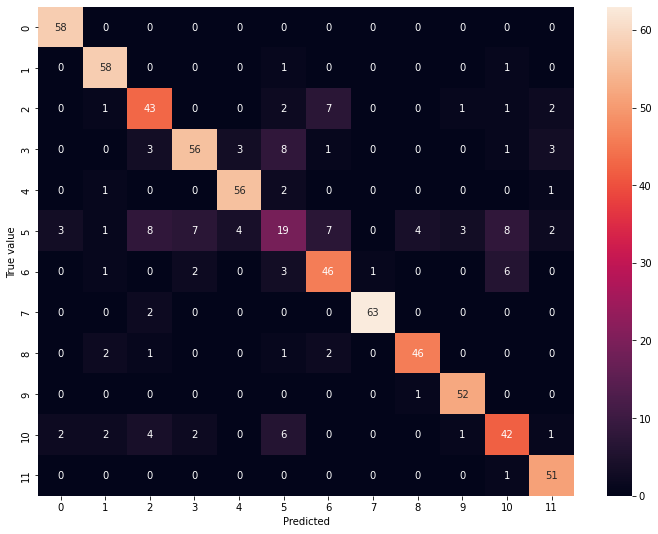

In [28]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (10,5) & (3,5) with 8,8 incorrect classifications represents how schizophrenia & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [29]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        58
           2       0.88      0.97      0.92        60
           3       0.70      0.75      0.73        57
           4       0.84      0.75      0.79        75
           5       0.89      0.93      0.91        60
           6       0.45      0.29      0.35        66
           7       0.73      0.78      0.75        59
           8       0.98      0.97      0.98        65
           9       0.90      0.88      0.89        52
          10       0.91      0.98      0.95        53
          11       0.70      0.70      0.70        60
          12       0.85      0.98      0.91        52

    accuracy                           0.82       717
   macro avg       0.81      0.83      0.82       717
weighted avg       0.81      0.82      0.81       717



In [30]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


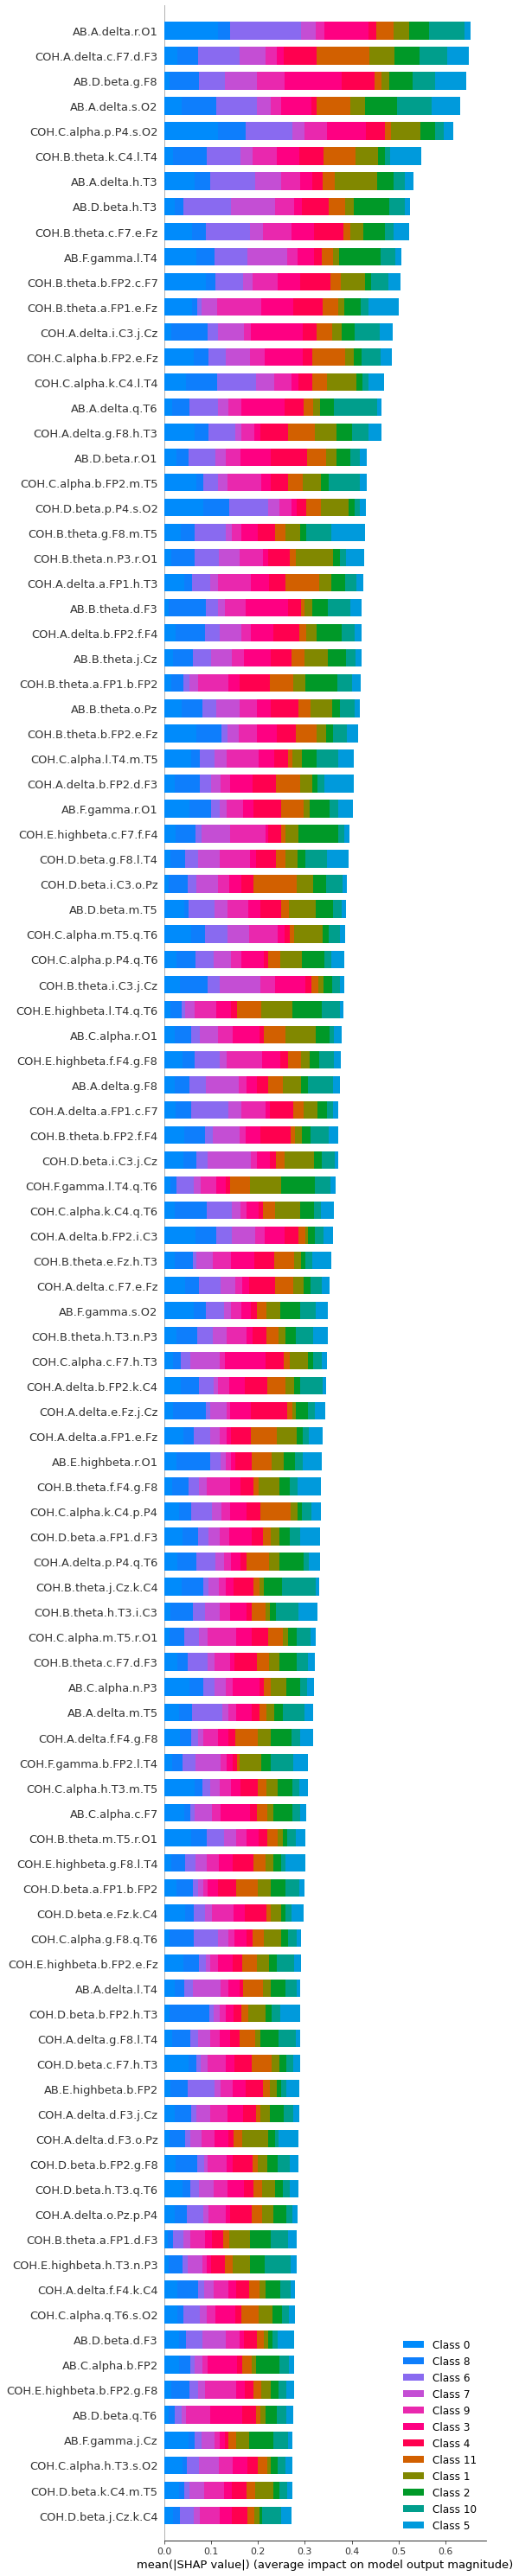

In [31]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [32]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
17,AB.A.delta.r.O1,39.021836
149,COH.A.delta.c.F7.d.F3,38.765997
63,AB.D.beta.g.F8,38.441401
18,AB.A.delta.s.O2,37.687623
623,COH.C.alpha.p.P4.s.O2,36.802016
...,...,...
161,COH.A.delta.c.F7.p.P4,0.444359
1055,COH.F.gamma.f.F4.m.T5,0.418300
807,COH.E.highbeta.a.FP1.k.C4,0.416768
871,COH.E.highbeta.e.Fz.m.T5,0.218163


In [33]:
# Below I am retrieving the 100 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(100)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['AB.A.delta.r.O1',
 'COH.A.delta.c.F7.d.F3',
 'AB.D.beta.g.F8',
 'AB.A.delta.s.O2',
 'COH.C.alpha.p.P4.s.O2',
 'COH.B.theta.k.C4.l.T4',
 'AB.A.delta.h.T3',
 'AB.D.beta.h.T3',
 'COH.B.theta.c.F7.e.Fz',
 'AB.F.gamma.l.T4',
 'COH.B.theta.b.FP2.c.F7',
 'COH.B.theta.a.FP1.e.Fz',
 'COH.A.delta.i.C3.j.Cz',
 'COH.C.alpha.b.FP2.e.Fz',
 'COH.C.alpha.k.C4.l.T4',
 'AB.A.delta.q.T6',
 'COH.A.delta.g.F8.h.T3',
 'AB.D.beta.r.O1',
 'COH.C.alpha.b.FP2.m.T5',
 'COH.D.beta.p.P4.s.O2',
 'COH.B.theta.g.F8.m.T5',
 'COH.B.theta.n.P3.r.O1',
 'COH.A.delta.a.FP1.h.T3',
 'AB.B.theta.d.F3',
 'COH.A.delta.b.FP2.f.F4',
 'AB.B.theta.j.Cz',
 'COH.B.theta.a.FP1.b.FP2',
 'AB.B.theta.o.Pz',
 'COH.B.theta.b.FP2.e.Fz',
 'COH.C.alpha.l.T4.m.T5',
 'COH.A.delta.b.FP2.d.F3',
 'AB.F.gamma.r.O1',
 'COH.E.highbeta.c.F7.f.F4',
 'COH.D.beta.g.F8.l.T4',
 'COH.D.beta.i.C3.o.Pz',
 'AB.D.beta.m.T5',
 'COH.C.alpha.m.T5.q.T6',
 'COH.C.alpha.p.P4.q.T6',
 'COH.B.theta.i.C3.j.Cz',
 'COH.E.highbeta.l.T4.q.T6',
 'AB.C.alpha.r.O1',
 'COH.E.h

In [34]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,AB.A.delta.r.O1,COH.A.delta.c.F7.d.F3,AB.D.beta.g.F8,AB.A.delta.s.O2,COH.C.alpha.p.P4.s.O2,COH.B.theta.k.C4.l.T4,AB.A.delta.h.T3,AB.D.beta.h.T3,COH.B.theta.c.F7.e.Fz,AB.F.gamma.l.T4,...,COH.A.delta.f.F4.k.C4,COH.C.alpha.q.T6.s.O2,AB.D.beta.d.F3,AB.C.alpha.b.FP2,COH.E.highbeta.b.FP2.g.F8,AB.D.beta.q.T6,AB.F.gamma.j.Cz,COH.C.alpha.h.T3.s.O2,COH.D.beta.k.C4.m.T5,COH.D.beta.j.Cz.k.C4
0,13.233880,45.796155,14.294143,11.893948,63.799803,49.913305,16.140803,8.873552,51.435759,11.331295,...,42.560374,56.812924,16.276273,61.424803,41.182244,10.977550,4.687539,23.081433,0.419844,62.435522
1,14.633266,62.110579,15.926999,12.055957,66.973261,61.908412,8.810296,11.041652,65.744154,3.312587,...,70.406659,47.131458,20.429403,21.772578,47.769422,24.480477,6.456111,2.835770,7.538727,57.600329
2,10.589773,75.399576,8.722198,10.161765,75.961028,51.598336,11.327534,9.766174,70.215205,2.455580,...,61.314896,61.285776,14.754415,24.053300,60.912563,12.876204,1.813874,6.387130,10.735649,60.629741
3,25.223010,37.362002,28.274453,25.769522,73.614359,64.211776,26.303330,25.896686,52.716439,5.500365,...,34.307321,79.829987,33.145163,53.940295,30.227919,27.561668,6.094846,22.823516,33.903095,59.199114
4,19.372897,38.050567,4.123758,12.834485,53.299924,39.764975,9.622323,3.630396,47.169607,1.037920,...,29.770952,73.080869,6.483243,3.020114,80.694962,2.648415,0.992237,5.624721,31.469360,74.827972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,18.814009,28.221600,12.051789,12.487389,58.568431,64.677794,10.044354,10.679140,21.325542,1.726266,...,82.922162,33.787405,17.074610,25.356081,25.899814,21.745380,2.240360,44.558739,36.926753,67.001977
941,12.970757,81.895359,7.464615,14.148625,97.743704,74.297350,10.097856,3.888032,74.070820,1.692851,...,95.131145,97.103907,7.125193,19.102602,53.715069,11.121046,1.722965,4.518937,9.821094,87.494456
942,11.745891,99.881837,5.342358,11.993932,50.232586,49.313945,9.916546,3.017633,99.808586,0.805843,...,60.806045,78.871037,6.013054,6.913787,26.638150,7.367747,0.949449,53.401967,0.471616,60.715106
943,7.808459,67.284010,7.527330,8.397872,77.617881,72.423443,5.713006,4.667545,61.735219,1.371971,...,77.899776,76.224916,11.476164,23.616193,59.828733,7.386604,1.427683,54.329678,13.774469,70.761061


In [35]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [36]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [37]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4543722	total: 151ms	remaining: 12m 33s
1:	learn: 2.4202953	total: 304ms	remaining: 12m 40s
2:	learn: 2.3896807	total: 451ms	remaining: 12m 30s
3:	learn: 2.3619562	total: 601ms	remaining: 12m 30s
4:	learn: 2.3346335	total: 754ms	remaining: 12m 33s
5:	learn: 2.3085562	total: 906ms	remaining: 12m 34s
6:	learn: 2.2833286	total: 1.06s	remaining: 12m 38s
7:	learn: 2.2561854	total: 1.22s	remaining: 12m 39s
8:	learn: 2.2283491	total: 1.37s	remaining: 12m 40s
9:	learn: 2.2030356	total: 1.53s	remaining: 12m 41s
10:	learn: 2.1808973	total: 1.68s	remaining: 12m 42s
11:	learn: 2.1571342	total: 1.83s	remaining: 12m 42s
12:	learn: 2.1333279	total: 1.99s	remaining: 12m 43s
13:	learn: 2.1122461	total: 2.14s	remaining: 12m 42s
14:	learn: 2.0932975	total: 2.29s	remaining: 12m 41s
15:	learn: 2.0719116	total: 2.44s	remaining: 12m 41s
16:	learn: 2.0499549	total: 2.6s	remaining: 12m 41s
17:	learn: 2.0312527	total: 2.75s	remaining: 12m 40s
18:	learn: 2.0102090	total: 2.9s	remaining: 12m 40s
19:	l

156:	learn: 0.7218893	total: 25s	remaining: 12m 51s
157:	learn: 0.7191204	total: 25.2s	remaining: 12m 51s
158:	learn: 0.7157277	total: 25.4s	remaining: 12m 51s
159:	learn: 0.7099036	total: 25.5s	remaining: 12m 52s
160:	learn: 0.7053200	total: 25.7s	remaining: 12m 51s
161:	learn: 0.6990773	total: 25.8s	remaining: 12m 51s
162:	learn: 0.6930252	total: 26s	remaining: 12m 51s
163:	learn: 0.6877131	total: 26.2s	remaining: 12m 51s
164:	learn: 0.6826493	total: 26.3s	remaining: 12m 51s
165:	learn: 0.6764176	total: 26.5s	remaining: 12m 51s
166:	learn: 0.6715240	total: 26.7s	remaining: 12m 51s
167:	learn: 0.6664319	total: 26.8s	remaining: 12m 51s
168:	learn: 0.6610302	total: 27s	remaining: 12m 51s
169:	learn: 0.6573811	total: 27.1s	remaining: 12m 51s
170:	learn: 0.6541974	total: 27.3s	remaining: 12m 51s
171:	learn: 0.6493275	total: 27.5s	remaining: 12m 51s
172:	learn: 0.6448352	total: 27.6s	remaining: 12m 50s
173:	learn: 0.6422835	total: 27.8s	remaining: 12m 50s
174:	learn: 0.6388057	total: 28s	r

310:	learn: 0.3108085	total: 50.3s	remaining: 12m 38s
311:	learn: 0.3094684	total: 50.5s	remaining: 12m 38s
312:	learn: 0.3073352	total: 50.7s	remaining: 12m 38s
313:	learn: 0.3060595	total: 50.8s	remaining: 12m 38s
314:	learn: 0.3051047	total: 51s	remaining: 12m 38s
315:	learn: 0.3042869	total: 51.2s	remaining: 12m 38s
316:	learn: 0.3027174	total: 51.3s	remaining: 12m 38s
317:	learn: 0.3017231	total: 51.5s	remaining: 12m 38s
318:	learn: 0.3000341	total: 51.7s	remaining: 12m 38s
319:	learn: 0.2986886	total: 51.8s	remaining: 12m 38s
320:	learn: 0.2974711	total: 52s	remaining: 12m 38s
321:	learn: 0.2963775	total: 52.2s	remaining: 12m 37s
322:	learn: 0.2951738	total: 52.3s	remaining: 12m 37s
323:	learn: 0.2935435	total: 52.5s	remaining: 12m 37s
324:	learn: 0.2920681	total: 52.7s	remaining: 12m 37s
325:	learn: 0.2906435	total: 52.8s	remaining: 12m 37s
326:	learn: 0.2897604	total: 53s	remaining: 12m 37s
327:	learn: 0.2886323	total: 53.2s	remaining: 12m 37s
328:	learn: 0.2869003	total: 53.3s

463:	learn: 0.1708990	total: 1m 15s	remaining: 12m 18s
464:	learn: 0.1702558	total: 1m 15s	remaining: 12m 17s
465:	learn: 0.1692903	total: 1m 15s	remaining: 12m 17s
466:	learn: 0.1688319	total: 1m 16s	remaining: 12m 17s
467:	learn: 0.1682856	total: 1m 16s	remaining: 12m 17s
468:	learn: 0.1676775	total: 1m 16s	remaining: 12m 17s
469:	learn: 0.1668491	total: 1m 16s	remaining: 12m 17s
470:	learn: 0.1662366	total: 1m 16s	remaining: 12m 17s
471:	learn: 0.1657074	total: 1m 16s	remaining: 12m 17s
472:	learn: 0.1650972	total: 1m 17s	remaining: 12m 17s
473:	learn: 0.1645668	total: 1m 17s	remaining: 12m 16s
474:	learn: 0.1640005	total: 1m 17s	remaining: 12m 16s
475:	learn: 0.1634101	total: 1m 17s	remaining: 12m 16s
476:	learn: 0.1629778	total: 1m 17s	remaining: 12m 16s
477:	learn: 0.1625843	total: 1m 17s	remaining: 12m 16s
478:	learn: 0.1620595	total: 1m 17s	remaining: 12m 15s
479:	learn: 0.1615026	total: 1m 18s	remaining: 12m 15s
480:	learn: 0.1609458	total: 1m 18s	remaining: 12m 15s
481:	learn

615:	learn: 0.1109358	total: 1m 40s	remaining: 11m 58s
616:	learn: 0.1107256	total: 1m 41s	remaining: 11m 58s
617:	learn: 0.1105858	total: 1m 41s	remaining: 11m 58s
618:	learn: 0.1102908	total: 1m 41s	remaining: 11m 58s
619:	learn: 0.1099583	total: 1m 41s	remaining: 11m 58s
620:	learn: 0.1096795	total: 1m 41s	remaining: 11m 57s
621:	learn: 0.1094040	total: 1m 41s	remaining: 11m 57s
622:	learn: 0.1092048	total: 1m 42s	remaining: 11m 57s
623:	learn: 0.1090814	total: 1m 42s	remaining: 11m 57s
624:	learn: 0.1089840	total: 1m 42s	remaining: 11m 57s
625:	learn: 0.1086807	total: 1m 42s	remaining: 11m 57s
626:	learn: 0.1083861	total: 1m 42s	remaining: 11m 57s
627:	learn: 0.1082427	total: 1m 42s	remaining: 11m 56s
628:	learn: 0.1079118	total: 1m 43s	remaining: 11m 56s
629:	learn: 0.1075724	total: 1m 43s	remaining: 11m 56s
630:	learn: 0.1074469	total: 1m 43s	remaining: 11m 56s
631:	learn: 0.1071156	total: 1m 43s	remaining: 11m 56s
632:	learn: 0.1068384	total: 1m 43s	remaining: 11m 56s
633:	learn

765:	learn: 0.0805682	total: 2m 6s	remaining: 11m 38s
766:	learn: 0.0804101	total: 2m 6s	remaining: 11m 38s
767:	learn: 0.0803428	total: 2m 6s	remaining: 11m 37s
768:	learn: 0.0802369	total: 2m 6s	remaining: 11m 37s
769:	learn: 0.0800661	total: 2m 7s	remaining: 11m 37s
770:	learn: 0.0798759	total: 2m 7s	remaining: 11m 37s
771:	learn: 0.0797570	total: 2m 7s	remaining: 11m 37s
772:	learn: 0.0795985	total: 2m 7s	remaining: 11m 37s
773:	learn: 0.0794839	total: 2m 7s	remaining: 11m 37s
774:	learn: 0.0793892	total: 2m 7s	remaining: 11m 37s
775:	learn: 0.0792581	total: 2m 8s	remaining: 11m 36s
776:	learn: 0.0790893	total: 2m 8s	remaining: 11m 36s
777:	learn: 0.0789601	total: 2m 8s	remaining: 11m 36s
778:	learn: 0.0788207	total: 2m 8s	remaining: 11m 36s
779:	learn: 0.0786613	total: 2m 8s	remaining: 11m 36s
780:	learn: 0.0784970	total: 2m 8s	remaining: 11m 36s
781:	learn: 0.0783668	total: 2m 9s	remaining: 11m 36s
782:	learn: 0.0782188	total: 2m 9s	remaining: 11m 35s
783:	learn: 0.0781310	total:

915:	learn: 0.0619835	total: 2m 31s	remaining: 11m 16s
916:	learn: 0.0618881	total: 2m 31s	remaining: 11m 16s
917:	learn: 0.0617838	total: 2m 32s	remaining: 11m 15s
918:	learn: 0.0617421	total: 2m 32s	remaining: 11m 15s
919:	learn: 0.0616487	total: 2m 32s	remaining: 11m 15s
920:	learn: 0.0615416	total: 2m 32s	remaining: 11m 15s
921:	learn: 0.0614603	total: 2m 32s	remaining: 11m 15s
922:	learn: 0.0613668	total: 2m 32s	remaining: 11m 15s
923:	learn: 0.0612774	total: 2m 33s	remaining: 11m 14s
924:	learn: 0.0612031	total: 2m 33s	remaining: 11m 14s
925:	learn: 0.0610663	total: 2m 33s	remaining: 11m 14s
926:	learn: 0.0609841	total: 2m 33s	remaining: 11m 14s
927:	learn: 0.0608568	total: 2m 33s	remaining: 11m 14s
928:	learn: 0.0608077	total: 2m 33s	remaining: 11m 14s
929:	learn: 0.0607188	total: 2m 34s	remaining: 11m 14s
930:	learn: 0.0606710	total: 2m 34s	remaining: 11m 13s
931:	learn: 0.0605639	total: 2m 34s	remaining: 11m 13s
932:	learn: 0.0604719	total: 2m 34s	remaining: 11m 13s
933:	learn

1065:	learn: 0.0503096	total: 2m 57s	remaining: 10m 53s
1066:	learn: 0.0502356	total: 2m 57s	remaining: 10m 53s
1067:	learn: 0.0501642	total: 2m 57s	remaining: 10m 53s
1068:	learn: 0.0500790	total: 2m 57s	remaining: 10m 53s
1069:	learn: 0.0500194	total: 2m 57s	remaining: 10m 53s
1070:	learn: 0.0499496	total: 2m 57s	remaining: 10m 52s
1071:	learn: 0.0498825	total: 2m 58s	remaining: 10m 52s
1072:	learn: 0.0498313	total: 2m 58s	remaining: 10m 52s
1073:	learn: 0.0497516	total: 2m 58s	remaining: 10m 52s
1074:	learn: 0.0496975	total: 2m 58s	remaining: 10m 52s
1075:	learn: 0.0496361	total: 2m 58s	remaining: 10m 52s
1076:	learn: 0.0495698	total: 2m 58s	remaining: 10m 52s
1077:	learn: 0.0494939	total: 2m 59s	remaining: 10m 51s
1078:	learn: 0.0494782	total: 2m 59s	remaining: 10m 51s
1079:	learn: 0.0494095	total: 2m 59s	remaining: 10m 51s
1080:	learn: 0.0493249	total: 2m 59s	remaining: 10m 51s
1081:	learn: 0.0492866	total: 2m 59s	remaining: 10m 51s
1082:	learn: 0.0492284	total: 3m	remaining: 10m 

1213:	learn: 0.0419588	total: 3m 22s	remaining: 10m 31s
1214:	learn: 0.0419000	total: 3m 22s	remaining: 10m 31s
1215:	learn: 0.0418663	total: 3m 22s	remaining: 10m 30s
1216:	learn: 0.0418135	total: 3m 22s	remaining: 10m 30s
1217:	learn: 0.0417530	total: 3m 23s	remaining: 10m 30s
1218:	learn: 0.0417041	total: 3m 23s	remaining: 10m 30s
1219:	learn: 0.0416613	total: 3m 23s	remaining: 10m 30s
1220:	learn: 0.0415987	total: 3m 23s	remaining: 10m 30s
1221:	learn: 0.0415738	total: 3m 23s	remaining: 10m 29s
1222:	learn: 0.0415347	total: 3m 23s	remaining: 10m 29s
1223:	learn: 0.0414911	total: 3m 24s	remaining: 10m 29s
1224:	learn: 0.0414583	total: 3m 24s	remaining: 10m 29s
1225:	learn: 0.0414040	total: 3m 24s	remaining: 10m 29s
1226:	learn: 0.0413517	total: 3m 24s	remaining: 10m 29s
1227:	learn: 0.0413125	total: 3m 24s	remaining: 10m 29s
1228:	learn: 0.0412819	total: 3m 24s	remaining: 10m 28s
1229:	learn: 0.0412380	total: 3m 25s	remaining: 10m 28s
1230:	learn: 0.0411968	total: 3m 25s	remaining: 

1361:	learn: 0.0360415	total: 3m 47s	remaining: 10m 7s
1362:	learn: 0.0360066	total: 3m 47s	remaining: 10m 7s
1363:	learn: 0.0359694	total: 3m 47s	remaining: 10m 7s
1364:	learn: 0.0359331	total: 3m 48s	remaining: 10m 7s
1365:	learn: 0.0358836	total: 3m 48s	remaining: 10m 7s
1366:	learn: 0.0358634	total: 3m 48s	remaining: 10m 7s
1367:	learn: 0.0358299	total: 3m 48s	remaining: 10m 7s
1368:	learn: 0.0357901	total: 3m 48s	remaining: 10m 6s
1369:	learn: 0.0357503	total: 3m 48s	remaining: 10m 6s
1370:	learn: 0.0357156	total: 3m 49s	remaining: 10m 6s
1371:	learn: 0.0356946	total: 3m 49s	remaining: 10m 6s
1372:	learn: 0.0356635	total: 3m 49s	remaining: 10m 6s
1373:	learn: 0.0356266	total: 3m 49s	remaining: 10m 6s
1374:	learn: 0.0356013	total: 3m 49s	remaining: 10m 5s
1375:	learn: 0.0355797	total: 3m 49s	remaining: 10m 5s
1376:	learn: 0.0355385	total: 3m 50s	remaining: 10m 5s
1377:	learn: 0.0355046	total: 3m 50s	remaining: 10m 5s
1378:	learn: 0.0354655	total: 3m 50s	remaining: 10m 5s
1379:	lear

1513:	learn: 0.0314028	total: 4m 13s	remaining: 9m 43s
1514:	learn: 0.0313632	total: 4m 13s	remaining: 9m 43s
1515:	learn: 0.0313343	total: 4m 13s	remaining: 9m 43s
1516:	learn: 0.0312934	total: 4m 13s	remaining: 9m 43s
1517:	learn: 0.0312593	total: 4m 14s	remaining: 9m 42s
1518:	learn: 0.0312382	total: 4m 14s	remaining: 9m 42s
1519:	learn: 0.0312046	total: 4m 14s	remaining: 9m 42s
1520:	learn: 0.0311733	total: 4m 14s	remaining: 9m 42s
1521:	learn: 0.0311429	total: 4m 14s	remaining: 9m 42s
1522:	learn: 0.0311188	total: 4m 14s	remaining: 9m 42s
1523:	learn: 0.0310958	total: 4m 15s	remaining: 9m 41s
1524:	learn: 0.0310583	total: 4m 15s	remaining: 9m 41s
1525:	learn: 0.0310257	total: 4m 15s	remaining: 9m 41s
1526:	learn: 0.0310017	total: 4m 15s	remaining: 9m 41s
1527:	learn: 0.0309764	total: 4m 15s	remaining: 9m 41s
1528:	learn: 0.0309486	total: 4m 16s	remaining: 9m 41s
1529:	learn: 0.0309277	total: 4m 16s	remaining: 9m 40s
1530:	learn: 0.0309027	total: 4m 16s	remaining: 9m 40s
1531:	lear

1663:	learn: 0.0277084	total: 4m 38s	remaining: 9m 19s
1664:	learn: 0.0276861	total: 4m 39s	remaining: 9m 19s
1665:	learn: 0.0276552	total: 4m 39s	remaining: 9m 18s
1666:	learn: 0.0276394	total: 4m 39s	remaining: 9m 18s
1667:	learn: 0.0276056	total: 4m 39s	remaining: 9m 18s
1668:	learn: 0.0275901	total: 4m 39s	remaining: 9m 18s
1669:	learn: 0.0275683	total: 4m 39s	remaining: 9m 18s
1670:	learn: 0.0275434	total: 4m 40s	remaining: 9m 18s
1671:	learn: 0.0275246	total: 4m 40s	remaining: 9m 17s
1672:	learn: 0.0274938	total: 4m 40s	remaining: 9m 17s
1673:	learn: 0.0274651	total: 4m 40s	remaining: 9m 17s
1674:	learn: 0.0274454	total: 4m 40s	remaining: 9m 17s
1675:	learn: 0.0274309	total: 4m 41s	remaining: 9m 17s
1676:	learn: 0.0274207	total: 4m 41s	remaining: 9m 17s
1677:	learn: 0.0274002	total: 4m 41s	remaining: 9m 17s
1678:	learn: 0.0273756	total: 4m 41s	remaining: 9m 16s
1679:	learn: 0.0273516	total: 4m 41s	remaining: 9m 16s
1680:	learn: 0.0273319	total: 4m 41s	remaining: 9m 16s
1681:	lear

1815:	learn: 0.0246364	total: 5m 4s	remaining: 8m 54s
1816:	learn: 0.0246183	total: 5m 4s	remaining: 8m 54s
1817:	learn: 0.0245930	total: 5m 5s	remaining: 8m 54s
1818:	learn: 0.0245666	total: 5m 5s	remaining: 8m 53s
1819:	learn: 0.0245531	total: 5m 5s	remaining: 8m 53s
1820:	learn: 0.0245345	total: 5m 5s	remaining: 8m 53s
1821:	learn: 0.0245193	total: 5m 5s	remaining: 8m 53s
1822:	learn: 0.0245054	total: 5m 5s	remaining: 8m 53s
1823:	learn: 0.0244921	total: 5m 6s	remaining: 8m 53s
1824:	learn: 0.0244801	total: 5m 6s	remaining: 8m 52s
1825:	learn: 0.0244580	total: 5m 6s	remaining: 8m 52s
1826:	learn: 0.0244409	total: 5m 6s	remaining: 8m 52s
1827:	learn: 0.0244256	total: 5m 6s	remaining: 8m 52s
1828:	learn: 0.0244099	total: 5m 6s	remaining: 8m 52s
1829:	learn: 0.0243994	total: 5m 7s	remaining: 8m 52s
1830:	learn: 0.0243798	total: 5m 7s	remaining: 8m 51s
1831:	learn: 0.0243745	total: 5m 7s	remaining: 8m 51s
1832:	learn: 0.0243532	total: 5m 7s	remaining: 8m 51s
1833:	learn: 0.0243264	total

1965:	learn: 0.0222072	total: 5m 30s	remaining: 8m 29s
1966:	learn: 0.0221848	total: 5m 30s	remaining: 8m 29s
1967:	learn: 0.0221677	total: 5m 30s	remaining: 8m 29s
1968:	learn: 0.0221482	total: 5m 30s	remaining: 8m 29s
1969:	learn: 0.0221326	total: 5m 30s	remaining: 8m 28s
1970:	learn: 0.0221226	total: 5m 30s	remaining: 8m 28s
1971:	learn: 0.0221066	total: 5m 31s	remaining: 8m 28s
1972:	learn: 0.0220922	total: 5m 31s	remaining: 8m 28s
1973:	learn: 0.0220845	total: 5m 31s	remaining: 8m 28s
1974:	learn: 0.0220686	total: 5m 31s	remaining: 8m 28s
1975:	learn: 0.0220566	total: 5m 31s	remaining: 8m 27s
1976:	learn: 0.0220407	total: 5m 32s	remaining: 8m 27s
1977:	learn: 0.0220326	total: 5m 32s	remaining: 8m 27s
1978:	learn: 0.0220233	total: 5m 32s	remaining: 8m 27s
1979:	learn: 0.0220116	total: 5m 32s	remaining: 8m 27s
1980:	learn: 0.0220012	total: 5m 32s	remaining: 8m 27s
1981:	learn: 0.0219837	total: 5m 32s	remaining: 8m 26s
1982:	learn: 0.0219642	total: 5m 33s	remaining: 8m 26s
1983:	lear

2115:	learn: 0.0202125	total: 5m 55s	remaining: 8m 4s
2116:	learn: 0.0201992	total: 5m 55s	remaining: 8m 4s
2117:	learn: 0.0201909	total: 5m 55s	remaining: 8m 4s
2118:	learn: 0.0201850	total: 5m 56s	remaining: 8m 4s
2119:	learn: 0.0201793	total: 5m 56s	remaining: 8m 3s
2120:	learn: 0.0201684	total: 5m 56s	remaining: 8m 3s
2121:	learn: 0.0201613	total: 5m 56s	remaining: 8m 3s
2122:	learn: 0.0201466	total: 5m 56s	remaining: 8m 3s
2123:	learn: 0.0201344	total: 5m 56s	remaining: 8m 3s
2124:	learn: 0.0201207	total: 5m 57s	remaining: 8m 3s
2125:	learn: 0.0201052	total: 5m 57s	remaining: 8m 2s
2126:	learn: 0.0200922	total: 5m 57s	remaining: 8m 2s
2127:	learn: 0.0200756	total: 5m 57s	remaining: 8m 2s
2128:	learn: 0.0200619	total: 5m 57s	remaining: 8m 2s
2129:	learn: 0.0200452	total: 5m 57s	remaining: 8m 2s
2130:	learn: 0.0200323	total: 5m 58s	remaining: 8m 2s
2131:	learn: 0.0200183	total: 5m 58s	remaining: 8m 1s
2132:	learn: 0.0200043	total: 5m 58s	remaining: 8m 1s
2133:	learn: 0.0199908	total

2267:	learn: 0.0185240	total: 6m 21s	remaining: 7m 39s
2268:	learn: 0.0185121	total: 6m 21s	remaining: 7m 39s
2269:	learn: 0.0184987	total: 6m 21s	remaining: 7m 39s
2270:	learn: 0.0184845	total: 6m 21s	remaining: 7m 38s
2271:	learn: 0.0184760	total: 6m 22s	remaining: 7m 38s
2272:	learn: 0.0184658	total: 6m 22s	remaining: 7m 38s
2273:	learn: 0.0184607	total: 6m 22s	remaining: 7m 38s
2274:	learn: 0.0184529	total: 6m 22s	remaining: 7m 38s
2275:	learn: 0.0184408	total: 6m 22s	remaining: 7m 38s
2276:	learn: 0.0184328	total: 6m 22s	remaining: 7m 37s
2277:	learn: 0.0184220	total: 6m 23s	remaining: 7m 37s
2278:	learn: 0.0184111	total: 6m 23s	remaining: 7m 37s
2279:	learn: 0.0184020	total: 6m 23s	remaining: 7m 37s
2280:	learn: 0.0183915	total: 6m 23s	remaining: 7m 37s
2281:	learn: 0.0183828	total: 6m 23s	remaining: 7m 37s
2282:	learn: 0.0183729	total: 6m 23s	remaining: 7m 36s
2283:	learn: 0.0183652	total: 6m 24s	remaining: 7m 36s
2284:	learn: 0.0183551	total: 6m 24s	remaining: 7m 36s
2285:	lear

2417:	learn: 0.0171138	total: 6m 46s	remaining: 7m 14s
2418:	learn: 0.0171008	total: 6m 47s	remaining: 7m 14s
2419:	learn: 0.0170950	total: 6m 47s	remaining: 7m 14s
2420:	learn: 0.0170860	total: 6m 47s	remaining: 7m 14s
2421:	learn: 0.0170792	total: 6m 47s	remaining: 7m 13s
2422:	learn: 0.0170728	total: 6m 47s	remaining: 7m 13s
2423:	learn: 0.0170608	total: 6m 47s	remaining: 7m 13s
2424:	learn: 0.0170536	total: 6m 48s	remaining: 7m 13s
2425:	learn: 0.0170466	total: 6m 48s	remaining: 7m 13s
2426:	learn: 0.0170347	total: 6m 48s	remaining: 7m 13s
2427:	learn: 0.0170258	total: 6m 48s	remaining: 7m 12s
2428:	learn: 0.0170171	total: 6m 48s	remaining: 7m 12s
2429:	learn: 0.0170072	total: 6m 48s	remaining: 7m 12s
2430:	learn: 0.0170020	total: 6m 49s	remaining: 7m 12s
2431:	learn: 0.0169927	total: 6m 49s	remaining: 7m 12s
2432:	learn: 0.0169868	total: 6m 49s	remaining: 7m 12s
2433:	learn: 0.0169809	total: 6m 49s	remaining: 7m 11s
2434:	learn: 0.0169717	total: 6m 49s	remaining: 7m 11s
2435:	lear

2570:	learn: 0.0158586	total: 7m 12s	remaining: 6m 49s
2571:	learn: 0.0158527	total: 7m 13s	remaining: 6m 48s
2572:	learn: 0.0158452	total: 7m 13s	remaining: 6m 48s
2573:	learn: 0.0158344	total: 7m 13s	remaining: 6m 48s
2574:	learn: 0.0158269	total: 7m 13s	remaining: 6m 48s
2575:	learn: 0.0158215	total: 7m 13s	remaining: 6m 48s
2576:	learn: 0.0158144	total: 7m 13s	remaining: 6m 48s
2577:	learn: 0.0158062	total: 7m 14s	remaining: 6m 47s
2578:	learn: 0.0157985	total: 7m 14s	remaining: 6m 47s
2579:	learn: 0.0157904	total: 7m 14s	remaining: 6m 47s
2580:	learn: 0.0157834	total: 7m 14s	remaining: 6m 47s
2581:	learn: 0.0157754	total: 7m 14s	remaining: 6m 47s
2582:	learn: 0.0157738	total: 7m 15s	remaining: 6m 47s
2583:	learn: 0.0157656	total: 7m 15s	remaining: 6m 46s
2584:	learn: 0.0157594	total: 7m 15s	remaining: 6m 46s
2585:	learn: 0.0157518	total: 7m 15s	remaining: 6m 46s
2586:	learn: 0.0157431	total: 7m 15s	remaining: 6m 46s
2587:	learn: 0.0157351	total: 7m 15s	remaining: 6m 46s
2588:	lear

2720:	learn: 0.0147994	total: 7m 38s	remaining: 6m 23s
2721:	learn: 0.0147912	total: 7m 38s	remaining: 6m 23s
2722:	learn: 0.0147831	total: 7m 38s	remaining: 6m 23s
2723:	learn: 0.0147768	total: 7m 38s	remaining: 6m 23s
2724:	learn: 0.0147699	total: 7m 39s	remaining: 6m 23s
2725:	learn: 0.0147634	total: 7m 39s	remaining: 6m 23s
2726:	learn: 0.0147573	total: 7m 39s	remaining: 6m 22s
2727:	learn: 0.0147482	total: 7m 39s	remaining: 6m 22s
2728:	learn: 0.0147398	total: 7m 39s	remaining: 6m 22s
2729:	learn: 0.0147320	total: 7m 39s	remaining: 6m 22s
2730:	learn: 0.0147238	total: 7m 40s	remaining: 6m 22s
2731:	learn: 0.0147158	total: 7m 40s	remaining: 6m 22s
2732:	learn: 0.0147084	total: 7m 40s	remaining: 6m 21s
2733:	learn: 0.0146992	total: 7m 40s	remaining: 6m 21s
2734:	learn: 0.0146928	total: 7m 40s	remaining: 6m 21s
2735:	learn: 0.0146854	total: 7m 41s	remaining: 6m 21s
2736:	learn: 0.0146780	total: 7m 41s	remaining: 6m 21s
2737:	learn: 0.0146727	total: 7m 41s	remaining: 6m 21s
2738:	lear

2872:	learn: 0.0138288	total: 8m 4s	remaining: 5m 58s
2873:	learn: 0.0138235	total: 8m 4s	remaining: 5m 58s
2874:	learn: 0.0138167	total: 8m 4s	remaining: 5m 58s
2875:	learn: 0.0138094	total: 8m 4s	remaining: 5m 57s
2876:	learn: 0.0138044	total: 8m 4s	remaining: 5m 57s
2877:	learn: 0.0137980	total: 8m 5s	remaining: 5m 57s
2878:	learn: 0.0137921	total: 8m 5s	remaining: 5m 57s
2879:	learn: 0.0137853	total: 8m 5s	remaining: 5m 57s
2880:	learn: 0.0137782	total: 8m 5s	remaining: 5m 57s
2881:	learn: 0.0137729	total: 8m 5s	remaining: 5m 56s
2882:	learn: 0.0137697	total: 8m 5s	remaining: 5m 56s
2883:	learn: 0.0137650	total: 8m 6s	remaining: 5m 56s
2884:	learn: 0.0137598	total: 8m 6s	remaining: 5m 56s
2885:	learn: 0.0137524	total: 8m 6s	remaining: 5m 56s
2886:	learn: 0.0137454	total: 8m 6s	remaining: 5m 56s
2887:	learn: 0.0137376	total: 8m 6s	remaining: 5m 55s
2888:	learn: 0.0137337	total: 8m 6s	remaining: 5m 55s
2889:	learn: 0.0137272	total: 8m 7s	remaining: 5m 55s
2890:	learn: 0.0137224	total

3022:	learn: 0.0130464	total: 8m 29s	remaining: 5m 33s
3023:	learn: 0.0130422	total: 8m 29s	remaining: 5m 33s
3024:	learn: 0.0130339	total: 8m 29s	remaining: 5m 32s
3025:	learn: 0.0130296	total: 8m 30s	remaining: 5m 32s
3026:	learn: 0.0130244	total: 8m 30s	remaining: 5m 32s
3027:	learn: 0.0130188	total: 8m 30s	remaining: 5m 32s
3028:	learn: 0.0130123	total: 8m 30s	remaining: 5m 32s
3029:	learn: 0.0130098	total: 8m 30s	remaining: 5m 32s
3030:	learn: 0.0130039	total: 8m 30s	remaining: 5m 31s
3031:	learn: 0.0129992	total: 8m 31s	remaining: 5m 31s
3032:	learn: 0.0129948	total: 8m 31s	remaining: 5m 31s
3033:	learn: 0.0129887	total: 8m 31s	remaining: 5m 31s
3034:	learn: 0.0129860	total: 8m 31s	remaining: 5m 31s
3035:	learn: 0.0129821	total: 8m 31s	remaining: 5m 31s
3036:	learn: 0.0129750	total: 8m 32s	remaining: 5m 30s
3037:	learn: 0.0129703	total: 8m 32s	remaining: 5m 30s
3038:	learn: 0.0129640	total: 8m 32s	remaining: 5m 30s
3039:	learn: 0.0129590	total: 8m 32s	remaining: 5m 30s
3040:	lear

3172:	learn: 0.0123294	total: 8m 55s	remaining: 5m 8s
3173:	learn: 0.0123246	total: 8m 55s	remaining: 5m 7s
3174:	learn: 0.0123227	total: 8m 55s	remaining: 5m 7s
3175:	learn: 0.0123179	total: 8m 55s	remaining: 5m 7s
3176:	learn: 0.0123124	total: 8m 55s	remaining: 5m 7s
3177:	learn: 0.0123075	total: 8m 56s	remaining: 5m 7s
3178:	learn: 0.0123019	total: 8m 56s	remaining: 5m 7s
3179:	learn: 0.0122961	total: 8m 56s	remaining: 5m 6s
3180:	learn: 0.0122885	total: 8m 56s	remaining: 5m 6s
3181:	learn: 0.0122847	total: 8m 56s	remaining: 5m 6s
3182:	learn: 0.0122789	total: 8m 56s	remaining: 5m 6s
3183:	learn: 0.0122736	total: 8m 57s	remaining: 5m 6s
3184:	learn: 0.0122704	total: 8m 57s	remaining: 5m 6s
3185:	learn: 0.0122658	total: 8m 57s	remaining: 5m 5s
3186:	learn: 0.0122600	total: 8m 57s	remaining: 5m 5s
3187:	learn: 0.0122560	total: 8m 57s	remaining: 5m 5s
3188:	learn: 0.0122511	total: 8m 57s	remaining: 5m 5s
3189:	learn: 0.0122465	total: 8m 58s	remaining: 5m 5s
3190:	learn: 0.0122427	total

3324:	learn: 0.0116561	total: 9m 21s	remaining: 4m 42s
3325:	learn: 0.0116530	total: 9m 21s	remaining: 4m 42s
3326:	learn: 0.0116494	total: 9m 21s	remaining: 4m 42s
3327:	learn: 0.0116449	total: 9m 21s	remaining: 4m 42s
3328:	learn: 0.0116416	total: 9m 21s	remaining: 4m 41s
3329:	learn: 0.0116376	total: 9m 21s	remaining: 4m 41s
3330:	learn: 0.0116323	total: 9m 22s	remaining: 4m 41s
3331:	learn: 0.0116294	total: 9m 22s	remaining: 4m 41s
3332:	learn: 0.0116245	total: 9m 22s	remaining: 4m 41s
3333:	learn: 0.0116204	total: 9m 22s	remaining: 4m 41s
3334:	learn: 0.0116144	total: 9m 22s	remaining: 4m 40s
3335:	learn: 0.0116113	total: 9m 22s	remaining: 4m 40s
3336:	learn: 0.0116077	total: 9m 23s	remaining: 4m 40s
3337:	learn: 0.0116016	total: 9m 23s	remaining: 4m 40s
3338:	learn: 0.0115981	total: 9m 23s	remaining: 4m 40s
3339:	learn: 0.0115941	total: 9m 23s	remaining: 4m 40s
3340:	learn: 0.0115910	total: 9m 23s	remaining: 4m 39s
3341:	learn: 0.0115888	total: 9m 23s	remaining: 4m 39s
3342:	lear

3474:	learn: 0.0110556	total: 9m 46s	remaining: 4m 17s
3475:	learn: 0.0110503	total: 9m 46s	remaining: 4m 17s
3476:	learn: 0.0110478	total: 9m 46s	remaining: 4m 17s
3477:	learn: 0.0110450	total: 9m 46s	remaining: 4m 16s
3478:	learn: 0.0110393	total: 9m 47s	remaining: 4m 16s
3479:	learn: 0.0110344	total: 9m 47s	remaining: 4m 16s
3480:	learn: 0.0110322	total: 9m 47s	remaining: 4m 16s
3481:	learn: 0.0110309	total: 9m 47s	remaining: 4m 16s
3482:	learn: 0.0110268	total: 9m 47s	remaining: 4m 15s
3483:	learn: 0.0110221	total: 9m 47s	remaining: 4m 15s
3484:	learn: 0.0110178	total: 9m 48s	remaining: 4m 15s
3485:	learn: 0.0110150	total: 9m 48s	remaining: 4m 15s
3486:	learn: 0.0110108	total: 9m 48s	remaining: 4m 15s
3487:	learn: 0.0110091	total: 9m 48s	remaining: 4m 15s
3488:	learn: 0.0110068	total: 9m 48s	remaining: 4m 14s
3489:	learn: 0.0110022	total: 9m 48s	remaining: 4m 14s
3490:	learn: 0.0109967	total: 9m 49s	remaining: 4m 14s
3491:	learn: 0.0109935	total: 9m 49s	remaining: 4m 14s
3492:	lear

3626:	learn: 0.0105110	total: 10m 11s	remaining: 3m 51s
3627:	learn: 0.0105075	total: 10m 11s	remaining: 3m 51s
3628:	learn: 0.0105044	total: 10m 11s	remaining: 3m 51s
3629:	learn: 0.0105010	total: 10m 12s	remaining: 3m 51s
3630:	learn: 0.0104988	total: 10m 12s	remaining: 3m 50s
3631:	learn: 0.0104958	total: 10m 12s	remaining: 3m 50s
3632:	learn: 0.0104917	total: 10m 12s	remaining: 3m 50s
3633:	learn: 0.0104895	total: 10m 12s	remaining: 3m 50s
3634:	learn: 0.0104861	total: 10m 12s	remaining: 3m 50s
3635:	learn: 0.0104817	total: 10m 13s	remaining: 3m 49s
3636:	learn: 0.0104793	total: 10m 13s	remaining: 3m 49s
3637:	learn: 0.0104750	total: 10m 13s	remaining: 3m 49s
3638:	learn: 0.0104701	total: 10m 13s	remaining: 3m 49s
3639:	learn: 0.0104665	total: 10m 13s	remaining: 3m 49s
3640:	learn: 0.0104636	total: 10m 13s	remaining: 3m 49s
3641:	learn: 0.0104599	total: 10m 14s	remaining: 3m 48s
3642:	learn: 0.0104560	total: 10m 14s	remaining: 3m 48s
3643:	learn: 0.0104515	total: 10m 14s	remaining:

3774:	learn: 0.0100172	total: 10m 35s	remaining: 3m 26s
3775:	learn: 0.0100145	total: 10m 36s	remaining: 3m 26s
3776:	learn: 0.0100125	total: 10m 36s	remaining: 3m 25s
3777:	learn: 0.0100116	total: 10m 36s	remaining: 3m 25s
3778:	learn: 0.0100086	total: 10m 36s	remaining: 3m 25s
3779:	learn: 0.0100045	total: 10m 36s	remaining: 3m 25s
3780:	learn: 0.0100024	total: 10m 36s	remaining: 3m 25s
3781:	learn: 0.0099990	total: 10m 36s	remaining: 3m 25s
3782:	learn: 0.0099958	total: 10m 37s	remaining: 3m 24s
3783:	learn: 0.0099940	total: 10m 37s	remaining: 3m 24s
3784:	learn: 0.0099909	total: 10m 37s	remaining: 3m 24s
3785:	learn: 0.0099874	total: 10m 37s	remaining: 3m 24s
3786:	learn: 0.0099851	total: 10m 37s	remaining: 3m 24s
3787:	learn: 0.0099814	total: 10m 37s	remaining: 3m 24s
3788:	learn: 0.0099788	total: 10m 38s	remaining: 3m 23s
3789:	learn: 0.0099763	total: 10m 38s	remaining: 3m 23s
3790:	learn: 0.0099727	total: 10m 38s	remaining: 3m 23s
3791:	learn: 0.0099692	total: 10m 38s	remaining:

3922:	learn: 0.0095809	total: 11m	remaining: 3m 1s
3923:	learn: 0.0095777	total: 11m	remaining: 3m 1s
3924:	learn: 0.0095750	total: 11m	remaining: 3m 1s
3925:	learn: 0.0095714	total: 11m 1s	remaining: 3m
3926:	learn: 0.0095684	total: 11m 1s	remaining: 3m
3927:	learn: 0.0095673	total: 11m 1s	remaining: 3m
3928:	learn: 0.0095640	total: 11m 1s	remaining: 3m
3929:	learn: 0.0095618	total: 11m 1s	remaining: 3m
3930:	learn: 0.0095588	total: 11m 1s	remaining: 2m 59s
3931:	learn: 0.0095567	total: 11m 2s	remaining: 2m 59s
3932:	learn: 0.0095548	total: 11m 2s	remaining: 2m 59s
3933:	learn: 0.0095518	total: 11m 2s	remaining: 2m 59s
3934:	learn: 0.0095485	total: 11m 2s	remaining: 2m 59s
3935:	learn: 0.0095468	total: 11m 2s	remaining: 2m 59s
3936:	learn: 0.0095429	total: 11m 2s	remaining: 2m 58s
3937:	learn: 0.0095398	total: 11m 3s	remaining: 2m 58s
3938:	learn: 0.0095369	total: 11m 3s	remaining: 2m 58s
3939:	learn: 0.0095343	total: 11m 3s	remaining: 2m 58s
3940:	learn: 0.0095334	total: 11m 3s	remai

4070:	learn: 0.0091885	total: 11m 25s	remaining: 2m 36s
4071:	learn: 0.0091867	total: 11m 25s	remaining: 2m 36s
4072:	learn: 0.0091841	total: 11m 25s	remaining: 2m 36s
4073:	learn: 0.0091817	total: 11m 25s	remaining: 2m 35s
4074:	learn: 0.0091785	total: 11m 25s	remaining: 2m 35s
4075:	learn: 0.0091757	total: 11m 26s	remaining: 2m 35s
4076:	learn: 0.0091722	total: 11m 26s	remaining: 2m 35s
4077:	learn: 0.0091693	total: 11m 26s	remaining: 2m 35s
4078:	learn: 0.0091675	total: 11m 26s	remaining: 2m 35s
4079:	learn: 0.0091648	total: 11m 26s	remaining: 2m 34s
4080:	learn: 0.0091623	total: 11m 26s	remaining: 2m 34s
4081:	learn: 0.0091595	total: 11m 27s	remaining: 2m 34s
4082:	learn: 0.0091570	total: 11m 27s	remaining: 2m 34s
4083:	learn: 0.0091547	total: 11m 27s	remaining: 2m 34s
4084:	learn: 0.0091517	total: 11m 27s	remaining: 2m 34s
4085:	learn: 0.0091489	total: 11m 27s	remaining: 2m 33s
4086:	learn: 0.0091470	total: 11m 27s	remaining: 2m 33s
4087:	learn: 0.0091450	total: 11m 28s	remaining:

4218:	learn: 0.0088292	total: 11m 50s	remaining: 2m 11s
4219:	learn: 0.0088276	total: 11m 50s	remaining: 2m 11s
4220:	learn: 0.0088260	total: 11m 50s	remaining: 2m 11s
4221:	learn: 0.0088236	total: 11m 50s	remaining: 2m 10s
4222:	learn: 0.0088220	total: 11m 50s	remaining: 2m 10s
4223:	learn: 0.0088205	total: 11m 50s	remaining: 2m 10s
4224:	learn: 0.0088197	total: 11m 51s	remaining: 2m 10s
4225:	learn: 0.0088191	total: 11m 51s	remaining: 2m 10s
4226:	learn: 0.0088172	total: 11m 51s	remaining: 2m 10s
4227:	learn: 0.0088150	total: 11m 51s	remaining: 2m 9s
4228:	learn: 0.0088124	total: 11m 51s	remaining: 2m 9s
4229:	learn: 0.0088101	total: 11m 51s	remaining: 2m 9s
4230:	learn: 0.0088071	total: 11m 52s	remaining: 2m 9s
4231:	learn: 0.0088053	total: 11m 52s	remaining: 2m 9s
4232:	learn: 0.0088037	total: 11m 52s	remaining: 2m 9s
4233:	learn: 0.0088009	total: 11m 52s	remaining: 2m 8s
4234:	learn: 0.0087982	total: 11m 52s	remaining: 2m 8s
4235:	learn: 0.0087959	total: 11m 52s	remaining: 2m 8s
4

4368:	learn: 0.0084927	total: 12m 15s	remaining: 1m 46s
4369:	learn: 0.0084903	total: 12m 15s	remaining: 1m 46s
4370:	learn: 0.0084889	total: 12m 15s	remaining: 1m 45s
4371:	learn: 0.0084860	total: 12m 15s	remaining: 1m 45s
4372:	learn: 0.0084843	total: 12m 15s	remaining: 1m 45s
4373:	learn: 0.0084826	total: 12m 16s	remaining: 1m 45s
4374:	learn: 0.0084803	total: 12m 16s	remaining: 1m 45s
4375:	learn: 0.0084786	total: 12m 16s	remaining: 1m 45s
4376:	learn: 0.0084761	total: 12m 16s	remaining: 1m 44s
4377:	learn: 0.0084735	total: 12m 16s	remaining: 1m 44s
4378:	learn: 0.0084704	total: 12m 16s	remaining: 1m 44s
4379:	learn: 0.0084673	total: 12m 17s	remaining: 1m 44s
4380:	learn: 0.0084650	total: 12m 17s	remaining: 1m 44s
4381:	learn: 0.0084626	total: 12m 17s	remaining: 1m 43s
4382:	learn: 0.0084606	total: 12m 17s	remaining: 1m 43s
4383:	learn: 0.0084578	total: 12m 17s	remaining: 1m 43s
4384:	learn: 0.0084562	total: 12m 17s	remaining: 1m 43s
4385:	learn: 0.0084534	total: 12m 18s	remaining:

4516:	learn: 0.0081739	total: 12m 40s	remaining: 1m 21s
4517:	learn: 0.0081724	total: 12m 40s	remaining: 1m 21s
4518:	learn: 0.0081705	total: 12m 40s	remaining: 1m 20s
4519:	learn: 0.0081683	total: 12m 40s	remaining: 1m 20s
4520:	learn: 0.0081658	total: 12m 40s	remaining: 1m 20s
4521:	learn: 0.0081639	total: 12m 40s	remaining: 1m 20s
4522:	learn: 0.0081607	total: 12m 41s	remaining: 1m 20s
4523:	learn: 0.0081585	total: 12m 41s	remaining: 1m 20s
4524:	learn: 0.0081556	total: 12m 41s	remaining: 1m 19s
4525:	learn: 0.0081526	total: 12m 41s	remaining: 1m 19s
4526:	learn: 0.0081501	total: 12m 41s	remaining: 1m 19s
4527:	learn: 0.0081484	total: 12m 41s	remaining: 1m 19s
4528:	learn: 0.0081477	total: 12m 42s	remaining: 1m 19s
4529:	learn: 0.0081468	total: 12m 42s	remaining: 1m 19s
4530:	learn: 0.0081442	total: 12m 42s	remaining: 1m 18s
4531:	learn: 0.0081424	total: 12m 42s	remaining: 1m 18s
4532:	learn: 0.0081400	total: 12m 42s	remaining: 1m 18s
4533:	learn: 0.0081386	total: 12m 42s	remaining:

4666:	learn: 0.0078761	total: 13m 5s	remaining: 56s
4667:	learn: 0.0078740	total: 13m 5s	remaining: 55.9s
4668:	learn: 0.0078714	total: 13m 5s	remaining: 55.7s
4669:	learn: 0.0078706	total: 13m 5s	remaining: 55.5s
4670:	learn: 0.0078698	total: 13m 5s	remaining: 55.4s
4671:	learn: 0.0078669	total: 13m 6s	remaining: 55.2s
4672:	learn: 0.0078651	total: 13m 6s	remaining: 55s
4673:	learn: 0.0078638	total: 13m 6s	remaining: 54.9s
4674:	learn: 0.0078626	total: 13m 6s	remaining: 54.7s
4675:	learn: 0.0078607	total: 13m 6s	remaining: 54.5s
4676:	learn: 0.0078597	total: 13m 6s	remaining: 54.3s
4677:	learn: 0.0078581	total: 13m 7s	remaining: 54.2s
4678:	learn: 0.0078571	total: 13m 7s	remaining: 54s
4679:	learn: 0.0078556	total: 13m 7s	remaining: 53.8s
4680:	learn: 0.0078521	total: 13m 7s	remaining: 53.7s
4681:	learn: 0.0078505	total: 13m 7s	remaining: 53.5s
4682:	learn: 0.0078489	total: 13m 7s	remaining: 53.3s
4683:	learn: 0.0078467	total: 13m 8s	remaining: 53.2s
4684:	learn: 0.0078446	total: 13m 

4818:	learn: 0.0076044	total: 13m 30s	remaining: 30.5s
4819:	learn: 0.0076028	total: 13m 30s	remaining: 30.3s
4820:	learn: 0.0076011	total: 13m 31s	remaining: 30.1s
4821:	learn: 0.0075995	total: 13m 31s	remaining: 29.9s
4822:	learn: 0.0075976	total: 13m 31s	remaining: 29.8s
4823:	learn: 0.0075964	total: 13m 31s	remaining: 29.6s
4824:	learn: 0.0075938	total: 13m 31s	remaining: 29.4s
4825:	learn: 0.0075913	total: 13m 32s	remaining: 29.3s
4826:	learn: 0.0075889	total: 13m 32s	remaining: 29.1s
4827:	learn: 0.0075873	total: 13m 32s	remaining: 28.9s
4828:	learn: 0.0075854	total: 13m 32s	remaining: 28.8s
4829:	learn: 0.0075836	total: 13m 32s	remaining: 28.6s
4830:	learn: 0.0075817	total: 13m 32s	remaining: 28.4s
4831:	learn: 0.0075800	total: 13m 33s	remaining: 28.3s
4832:	learn: 0.0075789	total: 13m 33s	remaining: 28.1s
4833:	learn: 0.0075762	total: 13m 33s	remaining: 27.9s
4834:	learn: 0.0075739	total: 13m 33s	remaining: 27.8s
4835:	learn: 0.0075721	total: 13m 33s	remaining: 27.6s
4836:	lear

4968:	learn: 0.0073461	total: 13m 56s	remaining: 5.21s
4969:	learn: 0.0073439	total: 13m 56s	remaining: 5.05s
4970:	learn: 0.0073426	total: 13m 56s	remaining: 4.88s
4971:	learn: 0.0073406	total: 13m 56s	remaining: 4.71s
4972:	learn: 0.0073383	total: 13m 56s	remaining: 4.54s
4973:	learn: 0.0073364	total: 13m 56s	remaining: 4.37s
4974:	learn: 0.0073343	total: 13m 57s	remaining: 4.21s
4975:	learn: 0.0073323	total: 13m 57s	remaining: 4.04s
4976:	learn: 0.0073305	total: 13m 57s	remaining: 3.87s
4977:	learn: 0.0073286	total: 13m 57s	remaining: 3.7s
4978:	learn: 0.0073264	total: 13m 57s	remaining: 3.53s
4979:	learn: 0.0073244	total: 13m 57s	remaining: 3.37s
4980:	learn: 0.0073234	total: 13m 58s	remaining: 3.2s
4981:	learn: 0.0073218	total: 13m 58s	remaining: 3.03s
4982:	learn: 0.0073197	total: 13m 58s	remaining: 2.86s
4983:	learn: 0.0073179	total: 13m 58s	remaining: 2.69s
4984:	learn: 0.0073170	total: 13m 58s	remaining: 2.52s
4985:	learn: 0.0073150	total: 13m 58s	remaining: 2.35s
4986:	learn:

In [38]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.22535211267605634

In [39]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[10],
       [ 6],
       [ 1],
       [ 6],
       [ 6],
       [ 5],
       [11],
       [ 6],
       [ 6],
       [11],
       [ 6],
       [ 3],
       [ 6],
       [ 3],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [ 3],
       [ 7],
       [11],
       [ 6],
       [11],
       [ 6],
       [ 4],
       [ 6],
       [ 3],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 9],
       [ 6],
       [ 7],
       [ 4],
       [ 4],
       [ 6],
       [12],
       [ 6],
       [ 6],
       [ 6],
       [ 9],
       [ 6],
       [10],
       [ 6],
       [ 6],
       [ 4],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [11],
       [ 6],
       [ 6],
       [ 4],
       [ 6],
       [ 7],
       [ 4],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [ 1],
       [ 6],
       [ 4],
       [ 1],
       [ 7],
       [ 6],
       [ 6],
       [ 4],
       [ 4],
       [ 6],
       [11],

In [40]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  2,  2,  1,  4,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  2,  7,  0,  0,  0,  2,  1],
       [ 2,  0,  1,  4,  0, 14,  2,  0,  0,  0,  2,  0],
       [ 1,  0,  0,  9,  1, 11,  3,  0,  0,  0,  0,  1],
       [ 2,  0,  3,  6,  1, 10,  1,  0,  0,  0,  5,  0],
       [ 0,  0,  6,  6,  2, 32,  7,  1,  2,  0,  3,  2],
       [ 0,  0,  1,  3,  0, 14, 10,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  5,  4,  0,  0,  0,  3,  0],
       [ 0,  0,  3,  1,  0,  7,  0,  0,  2,  1,  5,  0],
       [ 0,  0,  3,  0,  1,  1,  2,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  4,  0, 14,  4,  0,  2,  2,  7,  1],
       [ 0,  0,  3,  4,  0,  4,  0,  0,  0,  0,  1,  2]], dtype=int64)

Text(87.0, 0.5, 'True value')

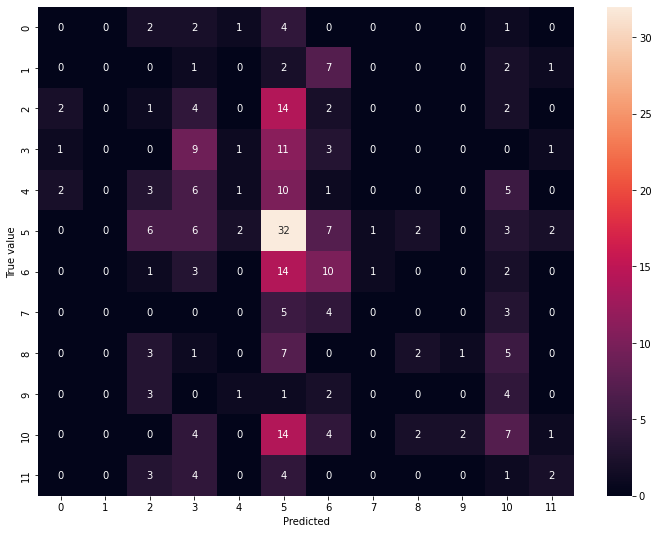

In [41]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,4) & (5,3) with 10,10 incorrect classifications represents how bipolar & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [42]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13
           3       0.05      0.04      0.04        25
           4       0.23      0.35      0.27        26
           5       0.17      0.04      0.06        28
           6       0.27      0.52      0.36        61
           7       0.25      0.32      0.28        31
           8       0.00      0.00      0.00        12
           9       0.33      0.11      0.16        19
          10       0.00      0.00      0.00        11
          11       0.20      0.21      0.20        34
          12       0.29      0.14      0.19        14

    accuracy                           0.23       284
   macro avg       0.15      0.14      0.13       284
weighted avg       0.19      0.23      0.19       284



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [43]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html